In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.linear_model import LogisticRegression


### Load Data

In [2]:
!pwd

/app/digicow/notebooks


In [3]:
## Loading the data
train_df = pd.read_csv('/app/digicow/data/Train.csv')
test_df = pd.read_csv('/app/digicow/data/Test.csv')
#y_true = pd.read_csv('reference.csv')['Target_AUC']

### Exploratory Data Analysis

In [4]:
train_df.head()

,ID,farmer_name,training_day,gender,registration,age,group_name,belong_to_cooperative,county,subcounty,ward,adopted_within_07_days,adopted_within_90_days,adopted_within_120_days,has_topic_trained_on,trainer,topics_list
0,ID_CENCC8,FAR_eqbhscj,2024-01-03,Female,Manual,Above 35,GRP_yvpakgc,0,CNT_lpotuu,SUB_lpotuuf,WRD_lpotuufh,0,0,0,0,['TRA_szrwyfzz'],"[['Ndume App', 'Poultry Feeding']]"
1,ID_YTO0FF,FAR_qlwtyik,2024-01-03,Female,Manual,Above 35,GRP_zemrbsy,1,CNT_fhdsoy,SUB_mdyljqn,WRD_atkhhvon,0,0,0,1,['TRA_rkvyofbh'],"[['Poultry Housing'], ['Poultry Housing']]"
2,ID_1476PE,FAR_somfzxp,2024-01-03,Female,Manual,Above 35,GRP_zmblxsw,0,CNT_fhdsoy,SUB_mdyljqn,WRD_atkhhvon,0,0,0,1,['TRA_rkvyofbh'],"[['Asili Fertilizer (Organic)', 'Biosecurity I..."
3,ID_MLKLIR,FAR_ongcqyd,2024-01-03,Female,Manual,Above 35,GRP_psdrfni,0,CNT_fhdsoy,SUB_mdyljqn,WRD_atkhhvon,0,0,0,1,['TRA_rkvyofbh'],"[['Poultry Products'], ['Record Keeping In Dai..."
4,ID_V5ZVTA,FAR_ztsbhhm,2024-01-03,Female,Ussd,Below 35,GRP_yvpakgc,0,CNT_lpotuu,SUB_lpotuuf,WRD_lpotuufh,0,0,0,0,['TRA_szrwyfzz'],"[['Ndume App', 'Poultry Feeding']]"


In [5]:
train_df.shape

(13536, 17)

In [6]:
train_df.farmer_name.nunique(), train_df.ID.nunique()

(13536, 13536)

In [7]:
train_df.training_day.dtypes

dtype('O')

In [8]:
train_df.isna().sum()

ID                         0
farmer_name                0
training_day               0
gender                     0
registration               0
age                        0
group_name                 0
belong_to_cooperative      0
county                     0
subcounty                  0
ward                       0
adopted_within_07_days     0
adopted_within_90_days     0
adopted_within_120_days    0
has_topic_trained_on       0
trainer                    0
topics_list                0
dtype: int64

In [9]:
for col in train_df.columns:
    print(col)

ID
farmer_name
training_day
gender
registration
age
group_name
belong_to_cooperative
county
subcounty
ward
adopted_within_07_days
adopted_within_90_days
adopted_within_120_days
has_topic_trained_on
trainer
topics_list


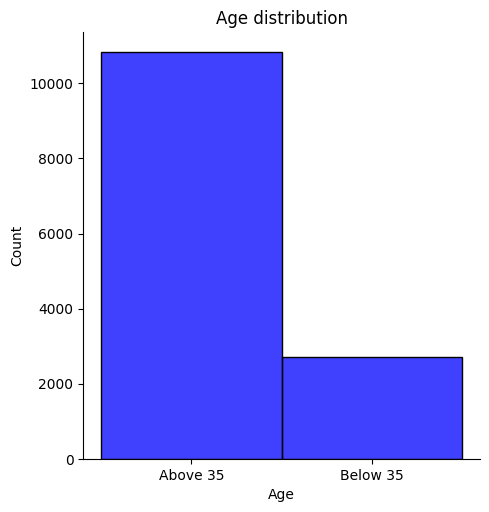

In [10]:
sns.displot(train_df['age'], color='blue')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

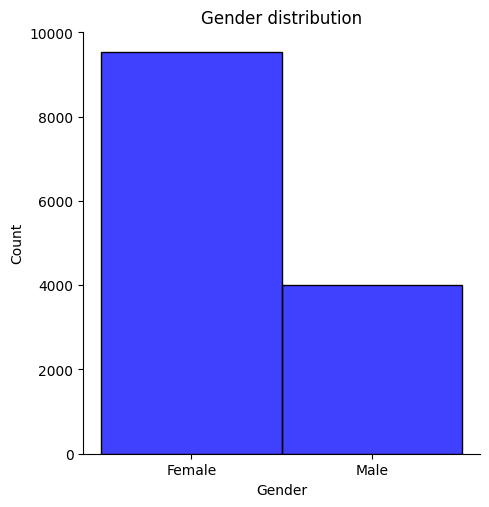

In [11]:
sns.displot(train_df['gender'], color='blue')
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

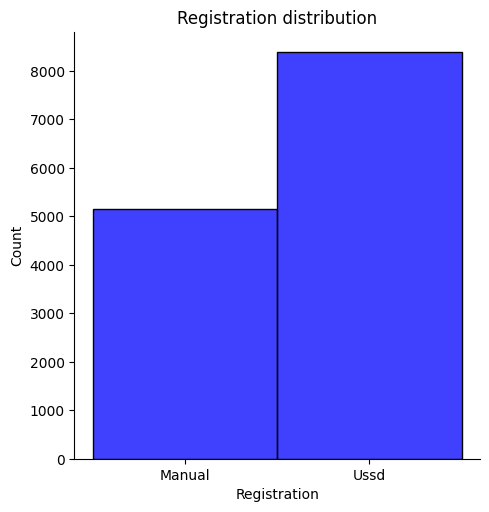

In [12]:
sns.displot(train_df['registration'], color='blue')
plt.title('Registration distribution')
plt.xlabel('Registration')
plt.ylabel('Count')
plt.show()

In [13]:
train_df.group_name.nunique()

864

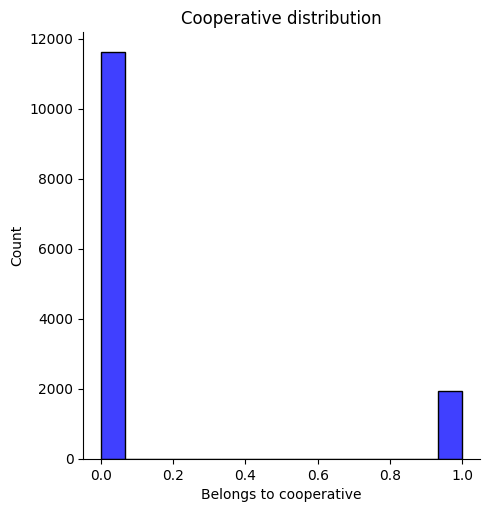

In [14]:
sns.displot(train_df['belong_to_cooperative'], color='blue')
plt.title('Cooperative distribution')
plt.xlabel('Belongs to cooperative')
plt.ylabel('Count')
plt.show()


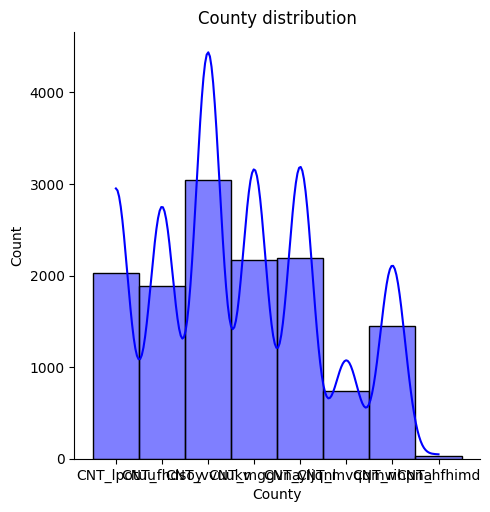

In [15]:
#train_df.county.value_counts()
sns.displot(train_df['county'], color='blue', kde=True)
plt.title('County distribution')
plt.xlabel('County')
plt.ylabel('Count')
plt.show()


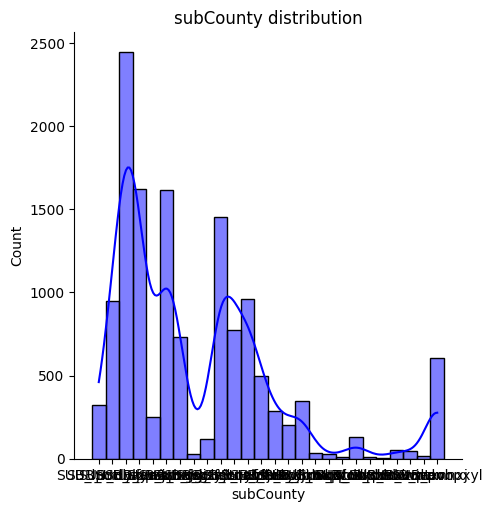

In [16]:
sns.displot(train_df['subcounty'], color='blue', kde=True)
plt.title('subCounty distribution')
plt.xlabel('subCounty')
plt.ylabel('Count')
plt.show()

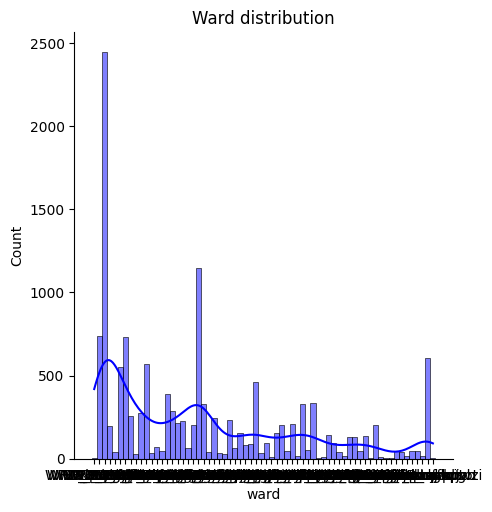

In [17]:
sns.displot(train_df['ward'], color='blue', kde=True)
plt.title('Ward distribution')
plt.xlabel('ward')
plt.ylabel('Count')
plt.show()

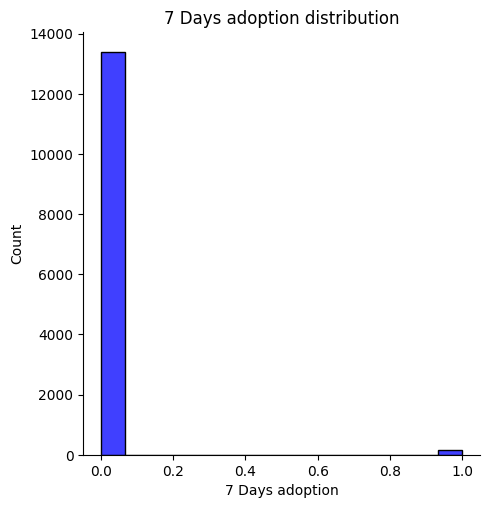

In [18]:
#train_df.adopted_within_07_days.value_counts()
sns.displot(train_df['adopted_within_07_days'], color='blue')
plt.title('7 Days adoption distribution')
plt.xlabel('7 Days adoption')
plt.ylabel('Count')
plt.show()

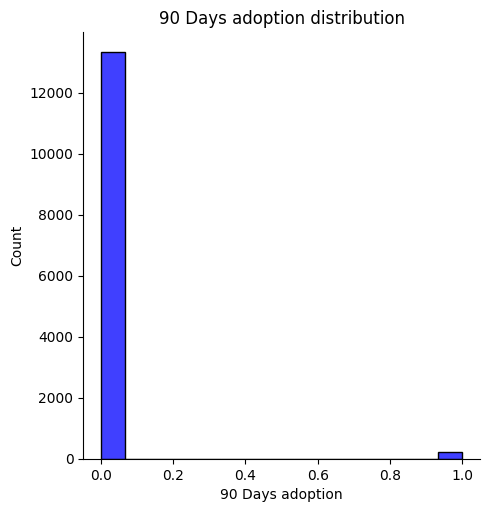

In [19]:
#train_df.adopted_within_90_days.value_counts()
sns.displot(train_df['adopted_within_90_days'], color='blue')
plt.title('90 Days adoption distribution')
plt.xlabel('90 Days adoption')
plt.ylabel('Count')
plt.show()

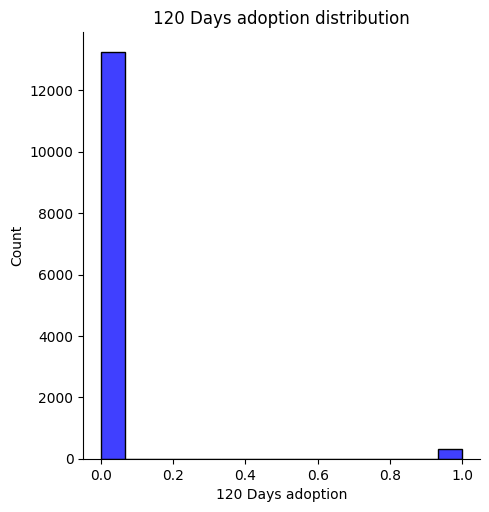

In [20]:
#train_df.adopted_within_120_days.value_counts()
sns.displot(train_df['adopted_within_120_days'], color='blue')
plt.title('120 Days adoption distribution')
plt.xlabel('120 Days adoption')
plt.ylabel('Count')
plt.show()

In [21]:
for col in train_df.columns:
    print(col)

ID
farmer_name
training_day
gender
registration
age
group_name
belong_to_cooperative
county
subcounty
ward
adopted_within_07_days
adopted_within_90_days
adopted_within_120_days
has_topic_trained_on
trainer
topics_list


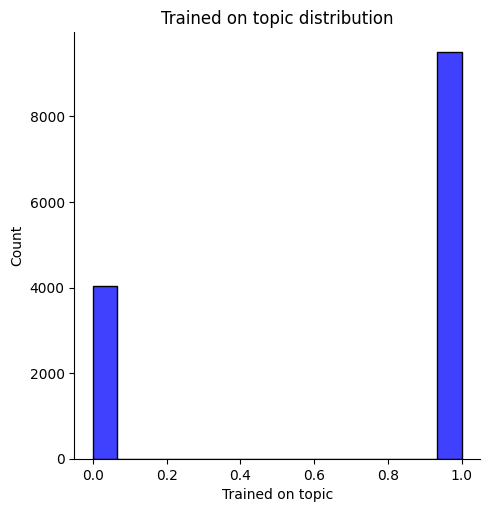

In [22]:
sns.displot(train_df['has_topic_trained_on'], color='blue')
plt.title('Trained on topic distribution')
plt.xlabel('Trained on topic')
plt.ylabel('Count')
plt.show()

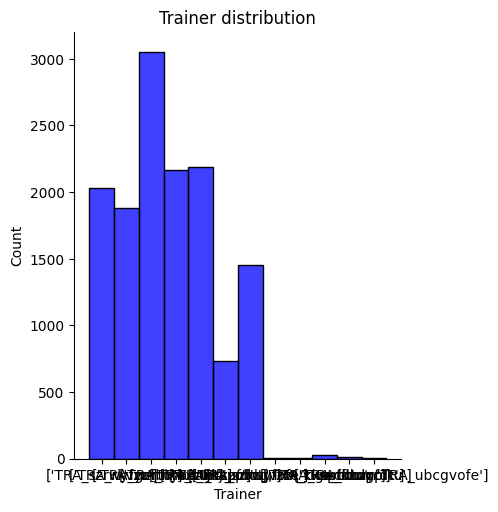

In [23]:
sns.displot(train_df['trainer'], color='blue')
plt.title('Trainer distribution')
plt.xlabel('Trainer')
plt.ylabel('Count')
plt.show()

In [24]:
train_df.topics_list.nunique()

2250

#### Takeaways

- Data is quite imbalanced (gender, age, registration type, co-operative membership, 7/90/120 day adoption)
- The county, subcounty and ward are right skewed 
- **topics_list** is quite messy, might have to figure out a way to clean the data for better analysis ...

### TODO: Figure out how to deal with imbalanced data for categorical prediction. Choose best approach and design models

#### Data cleaning

In [25]:
for col in train_df.columns:
    print(col)

ID
farmer_name
training_day
gender
registration
age
group_name
belong_to_cooperative
county
subcounty
ward
adopted_within_07_days
adopted_within_90_days
adopted_within_120_days
has_topic_trained_on
trainer
topics_list


In [26]:
for c in [col for col in train_df.columns if col.endswith('day')]:
  if c in train_df.columns:
    train_df[c] = pd.to_datetime(train_df[c], errors='coerce')

In [27]:
for c in [col for col in test_df.columns if col.endswith('day')]:
  if c in test_df.columns:
    test_df[c] = pd.to_datetime(test_df[c], errors='coerce')

In [28]:
train_df.dtypes

ID                                 object
farmer_name                        object
training_day               datetime64[ns]
gender                             object
registration                       object
age                                object
group_name                         object
belong_to_cooperative               int64
county                             object
subcounty                          object
ward                               object
adopted_within_07_days              int64
adopted_within_90_days              int64
adopted_within_120_days             int64
has_topic_trained_on                int64
trainer                            object
topics_list                        object
dtype: object

In [29]:
target_cols = ['adopted_within_07_days', 'adopted_within_90_days', 'adopted_within_120_days']
for target_col in target_cols:
    train_df[target_col] = train_df[target_col].astype(int)

##### Load Prior dataset

In [30]:
prior_df = pd.read_csv('/app/digicow/data/Prior.csv')

In [31]:
prior_df.topics_list.sample(3)

36157         ['Pest And Disease Management In Crops']
8692                       ['Record Keeping In Dairy']
12685    ['How To Rear Healthy Chicken With Biodeal.']
Name: topics_list, dtype: object

In [32]:
train_df.topics_list.sample(3)

4818    [['Poultry Health Management.', 'Poultry Manag...
6804    [['Poultry Health Management..', 'Poultry Mana...
3017    [['Dairy Health Management', 'Diseases In Dair...
Name: topics_list, dtype: object

In [33]:
test_df.topics_list.sample(5)

4104    [['Pest And Disease Management In Crops'], ['W...
1418    [['Pest And Disease Management In Maize And Be...
4720    [['Poultry Health Mngt'], ['Poultry Feeding Wi...
4886    [['Clean Energy With Sistema Biogas'], ['Pest ...
3295    [['Clean Energy With Sistema Biogas'], ['Harve...
Name: topics_list, dtype: object

In [34]:
#train_df['topics_list'] = train_df['topics_list'].apply(clean_list)
#test_df['topics_list'] = test_df['topics_list'].apply(clean_list)

In [35]:
test_df.sample()

,ID,farmer_name,training_day,gender,registration,age,group_name,belong_to_cooperative,county,subcounty,ward,has_topic_trained_on,trainer,topics_list
1659,ID_CKOUOI,FAR_rwsbczb,2025-07-10,Female,Ussd,Above 35,GRP_ngswhzk,0,CNT_fhdsoy,SUB_vnahfhi,WRD_avjijsjd,1,['TRA_rkvyofbh'],"[['Livestock Management Practices.'], ['How To..."


In [36]:
prior_df.shape

(44882, 17)

In [37]:
prior_df.farmer_name.nunique()

6719

In [38]:
for target_col in target_cols:
    prior_df[target_col] = prior_df[target_col].astype(int)

In [39]:
for c in [col for col in prior_df.columns if col.endswith('day')]:
  if c in prior_df.columns:
    prior_df[c] = pd.to_datetime(prior_df[c], errors='coerce')

In [40]:
for col in prior_df.columns:
    print(col)

ID
farmer_name
training_day
gender
registration
age
group_name
belong_to_cooperative
county
subcounty
ward
adopted_within_07_days
adopted_within_90_days
adopted_within_120_days
has_topic_trained_on
trainer
topics_list


In [41]:
cols = ['gender', 'registration', 'age', 'belong_to_cooperative', 'county', 'subcounty', 'ward', 'adopted_within_07_days', \
            'adopted_within_90_days', 'adopted_within_120_days']

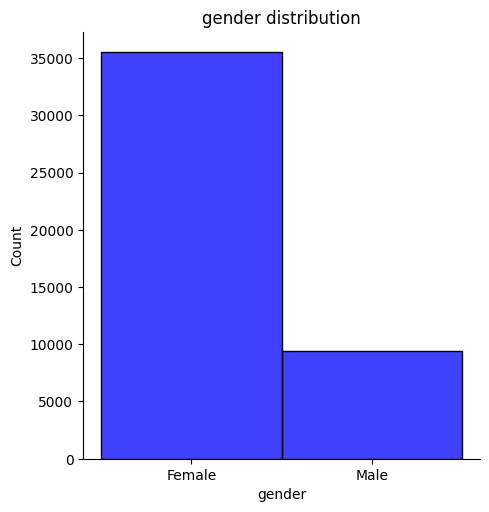

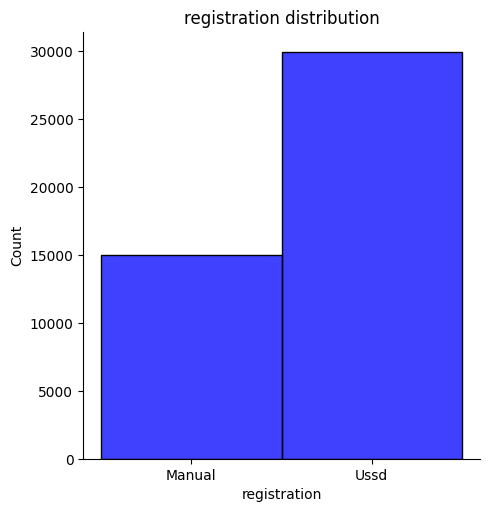

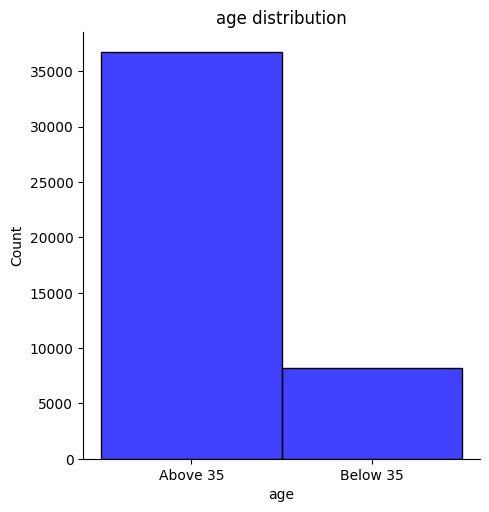

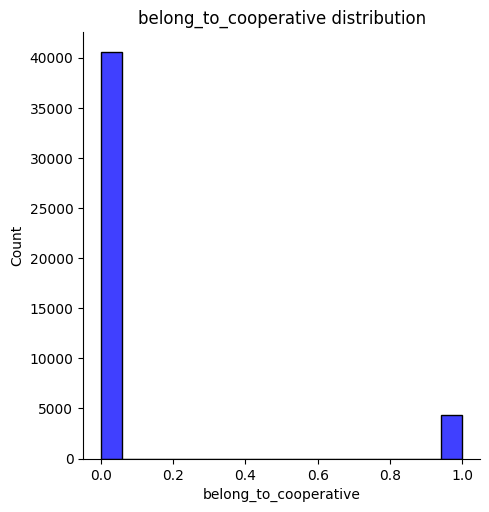

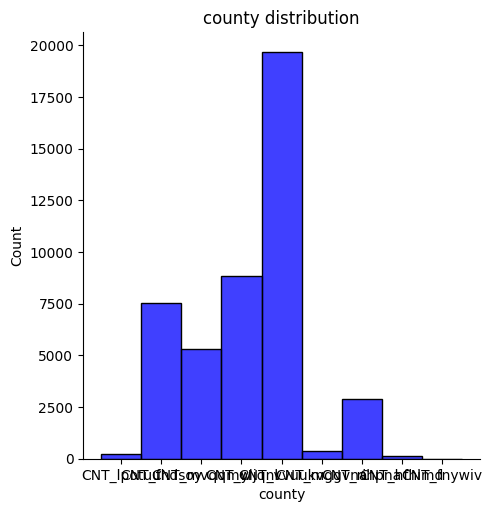

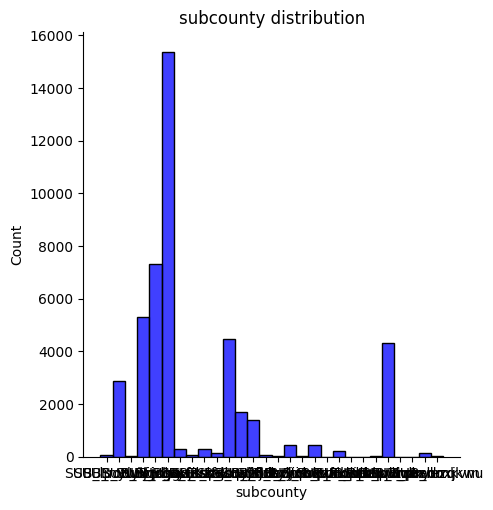

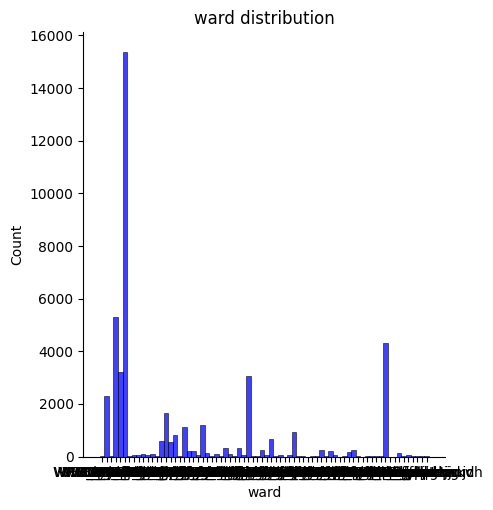

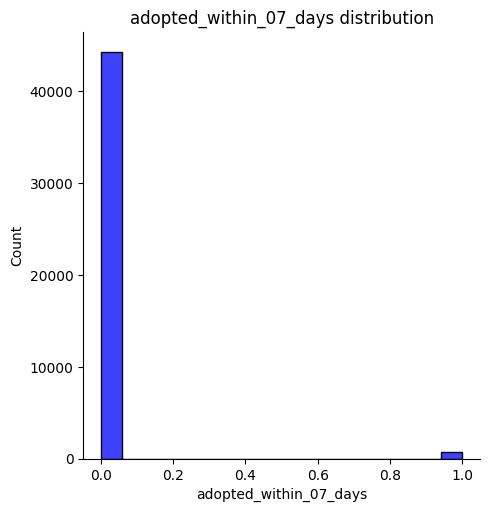

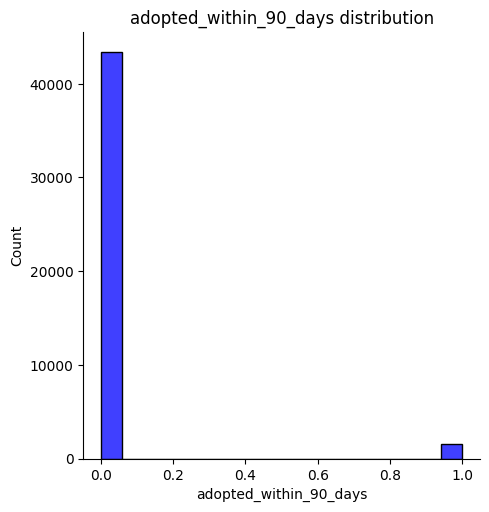

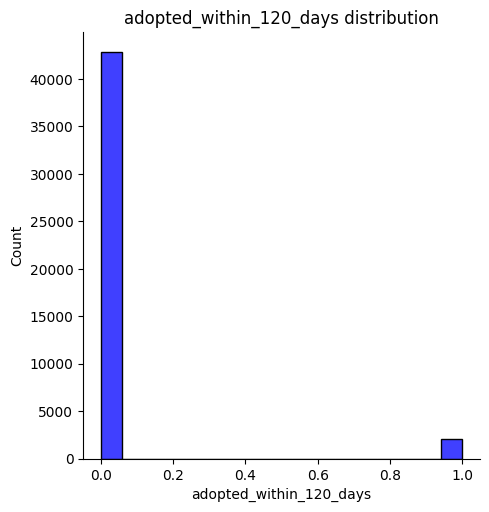

In [42]:
for col in cols:
    sns.displot(prior_df[col], color='blue')
    plt.title(f'{col} distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.show()

In [43]:
# Check overlap between Prior and Train sessions

overlap = prior_df.merge(
    train_df[['farmer_name', 'training_day']],
    on=['farmer_name', 'training_day']
)

print(f"Prior rows: {len(prior_df)}")
print(f"Train rows: {len(train_df)}")
print(f"Exact session overlaps (farmer + date): {len(overlap)}")
print(f"Overlap as % of Train: {len(overlap)/len(train_df)*100:.1f}%")

Prior rows: 44882
Train rows: 13536
Exact session overlaps (farmer + date): 0
Overlap as % of Train: 0.0%


In [44]:
top_farmer = prior_df['farmer_name'].value_counts().index[0]

In [45]:
top_farmer

'FAR_dukawjb'

In [46]:
cols = ['training_day', 'topics_list', 'adopted_within_07_days', 'adopted_within_90_days', 'adopted_within_120_days']
display(prior_df[prior_df['farmer_name'] == top_farmer][cols])

,training_day,topics_list,adopted_within_07_days,adopted_within_90_days,adopted_within_120_days
4690,2024-02-07,['How To Rear A Calf With Unga Products'],0,0,0
4691,2024-02-07,['How To Rear A Calf With Unga Products'],0,0,0
4692,2024-02-07,['How To Rear A Calf With Unga Products'],0,0,0
4693,2024-02-07,['How To Rear A Calf With Unga Products'],0,0,0
4694,2024-02-07,['Transition Cow Management- Care For Your Cow...,0,0,0
...,...,...,...,...,...
40225,2025-06-05,['Importance Of Vaccinations And Record'],0,1,1
40226,2025-06-05,['Importance Of Vaccinating Against East Coast...,0,0,0
40227,2025-06-05,['Importance Of Vaccinating Against East Coast...,0,0,0
40228,2025-06-05,['Importance Of Vaccinating Against East Coast...,0,0,0


In [47]:
prior_df[['ID', 'farmer_name', 'training_day']].duplicated().value_counts()

False    44882
Name: count, dtype: int64

# NEXT STEPS: 
1. Change topics_list in train and test to be lists so as to match prior dataset
2. Figure out how to merge with prior dataset
3. Train ML model

In [48]:
prior_df.sample(3)

,ID,farmer_name,training_day,gender,registration,age,group_name,belong_to_cooperative,county,subcounty,ward,adopted_within_07_days,adopted_within_90_days,adopted_within_120_days,has_topic_trained_on,trainer,topics_list
23238,ID_J36PO3,FAR_nslvlux,2024-09-05,Female,Manual,Above 35,GRP_uafertb,0,CNT_yljqnl,SUB_jchavji,WRD_ewbkpzpx,0,0,0,1,TRA_suiifsur,['Poultry Mngt Practices']
4291,ID_PTCOX8,FAR_qfsicrn,2024-02-05,Female,Manual,Above 35,GRP_fgkhoqb,0,CNT_yljqnl,SUB_jchavji,WRD_mymgodzd,0,0,0,1,TRA_suiifsur,['Disadvantages Of Natural Mating']
16936,ID_PVR8IG,FAR_jwcnuti,2024-06-08,Female,Ussd,Above 35,GRP_knunkll,0,CNT_fhdsoy,SUB_vnahfhi,WRD_avjijsjd,0,0,0,1,TRA_rkvyofbh,['Calf Feeding']


In [49]:
prior_df.shape, train_df.shape

((44882, 17), (13536, 17))

In [50]:
merged_train = pd.merge(test_df, prior_df, on=['ID', 'training_day'], how='inner')

In [51]:
merged_train.shape

(0, 29)

In [52]:
set1 = set(zip(train_df['ID'], train_df['training_day']))
set2 = set(zip(prior_df['ID'], prior_df['training_day']))
overlap = set1.intersection(set2)

In [53]:
print("Overlapping (id, training_day) pairs:")
for item in overlap:
    print(f"  {item}")

Overlapping (id, training_day) pairs:


#### Seems that there are no overlapping training days between the prior and train sets

In [54]:
concatenated_df = pd.concat([train_df, prior_df], ignore_index=True)

In [55]:
concatenated_df.shape

(58418, 17)

#### Check distribution of train and test features

In [56]:
cols = ['gender', 'registration', 'age', 'belong_to_cooperative', 'county', 'subcounty', 'ward']

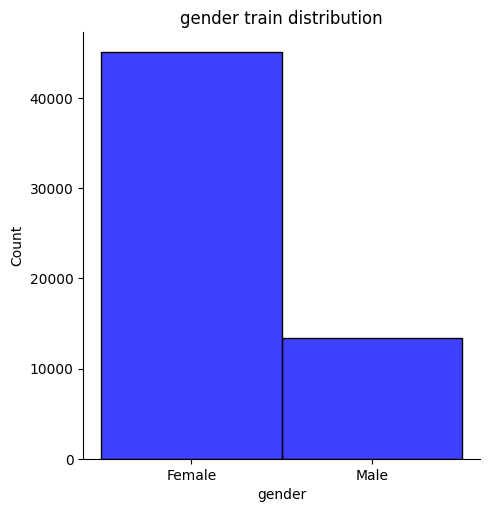

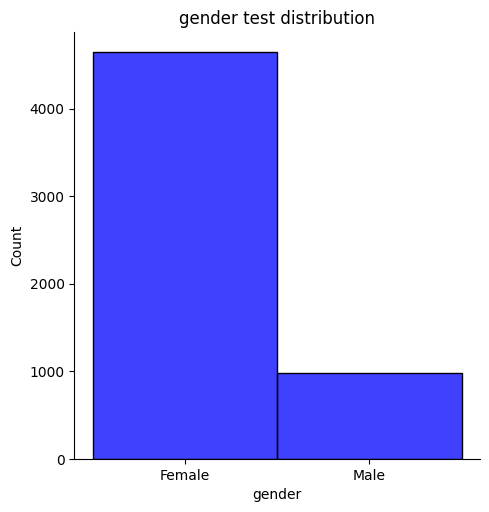

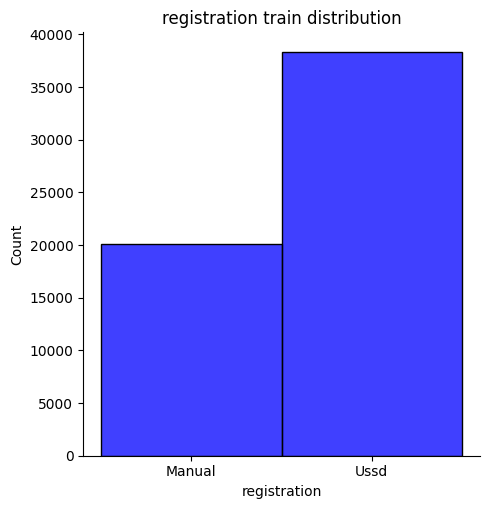

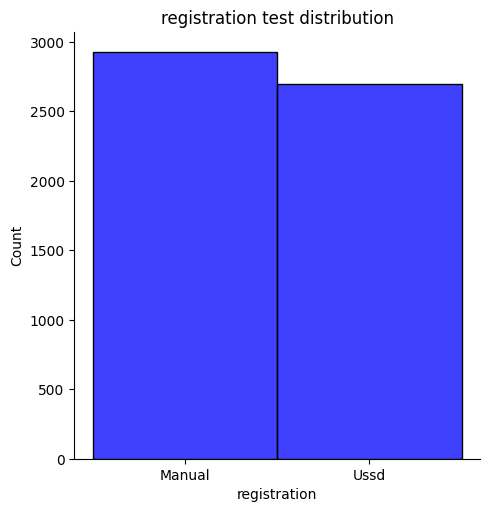

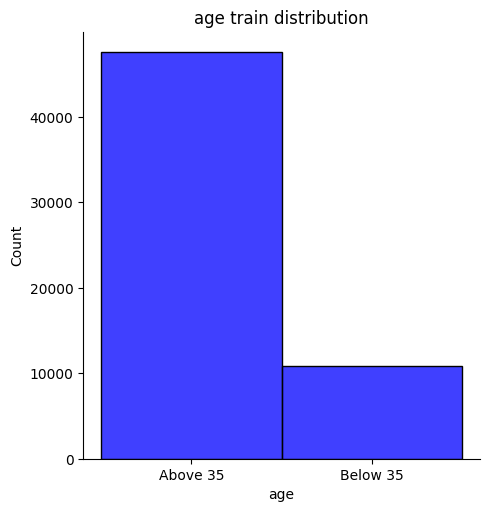

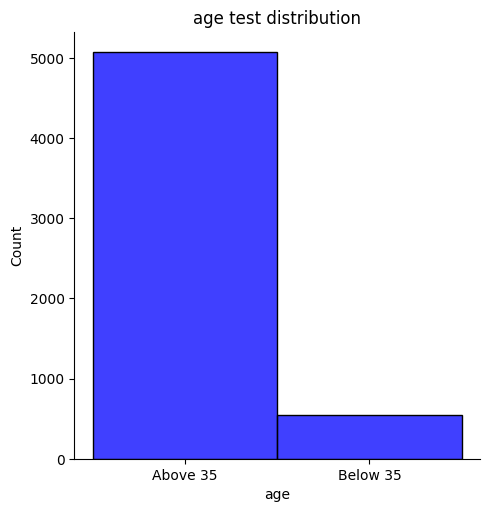

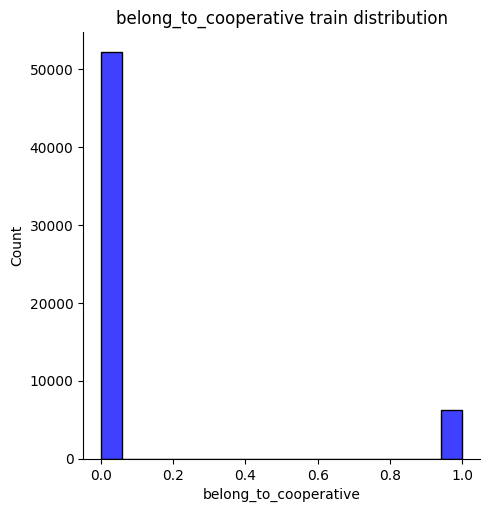

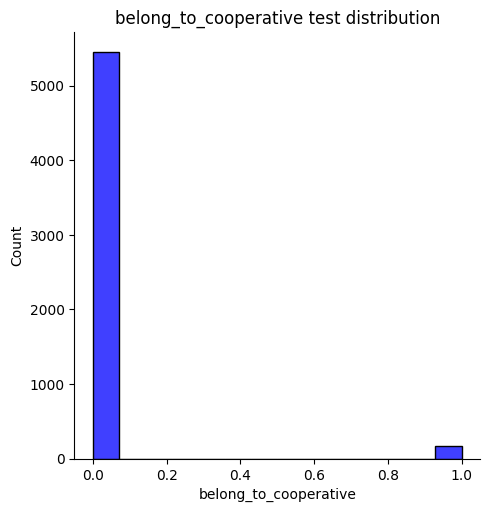

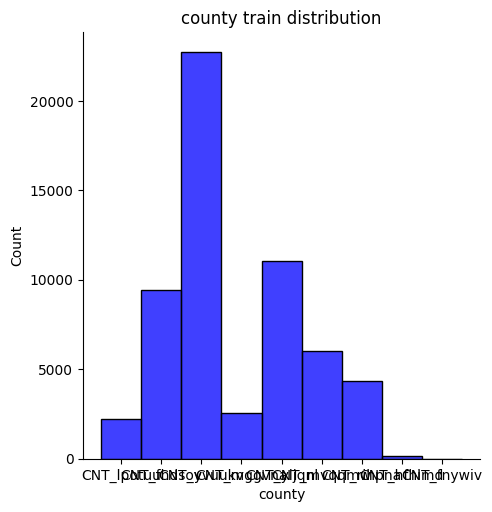

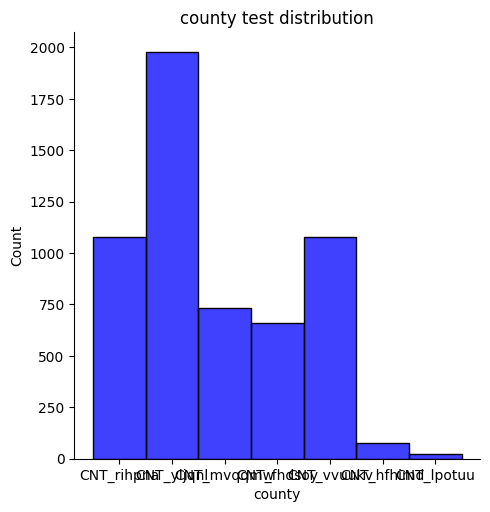

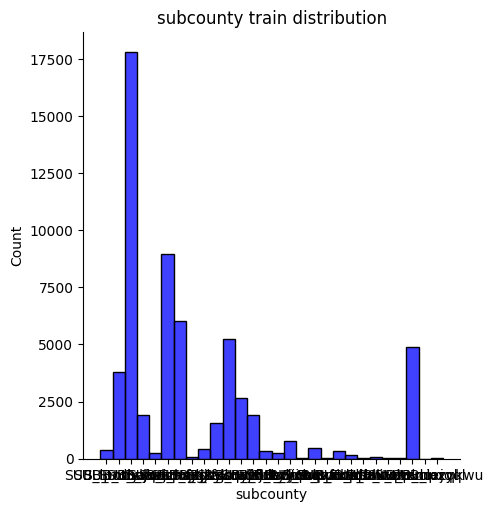

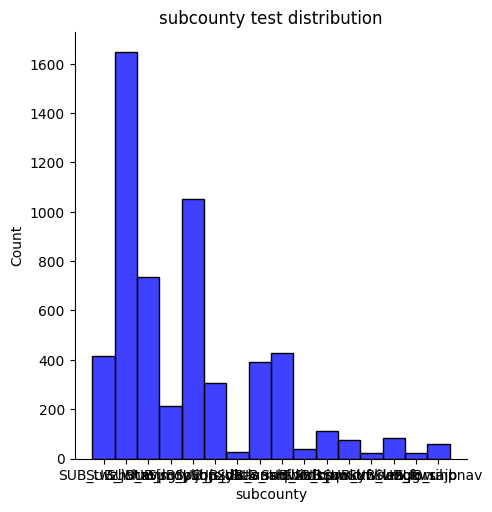

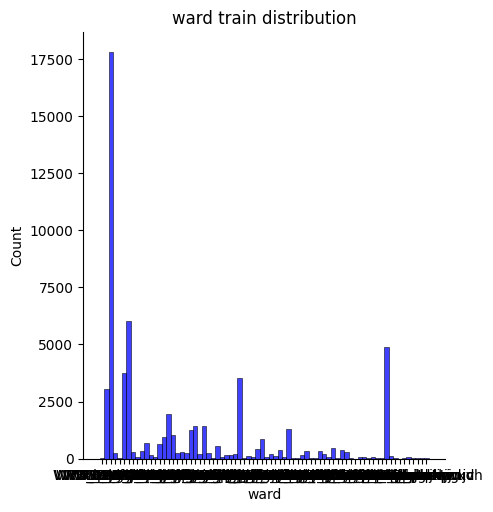

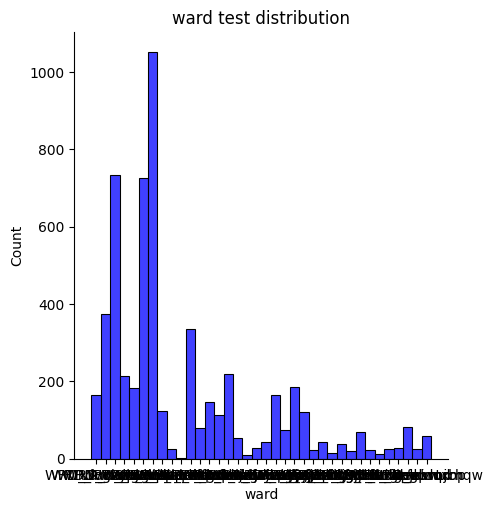

In [57]:
for col in cols:
    sns.displot(concatenated_df[col], color='blue')
    plt.title(f'{col} train distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.show()

    sns.displot(test_df[col], color='blue')
    plt.title(f'{col} test distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.show()

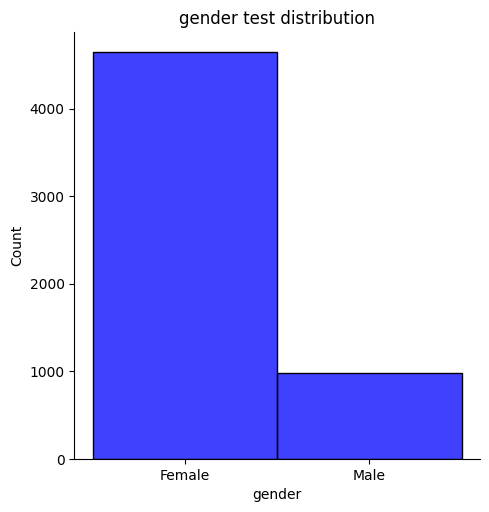

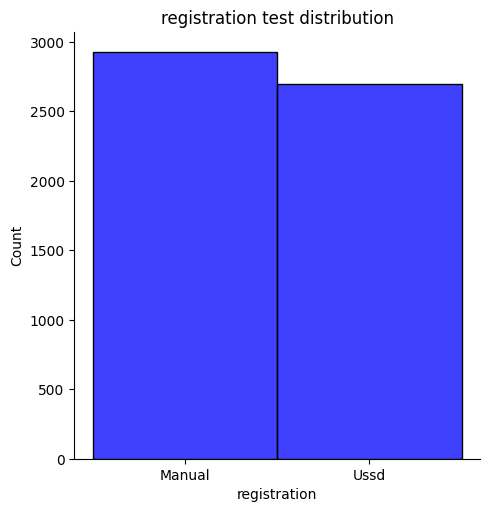

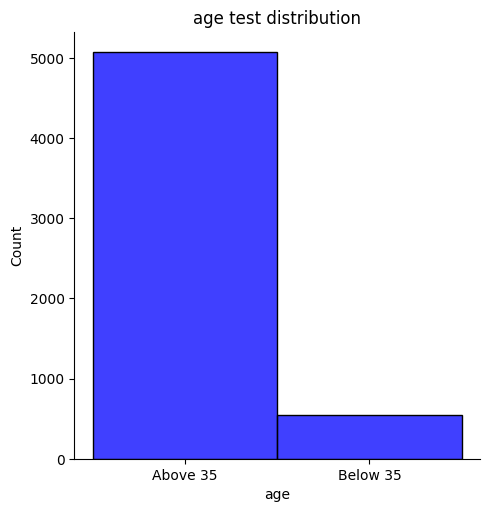

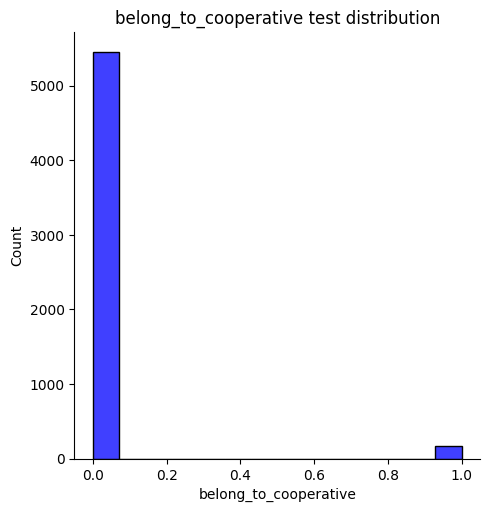

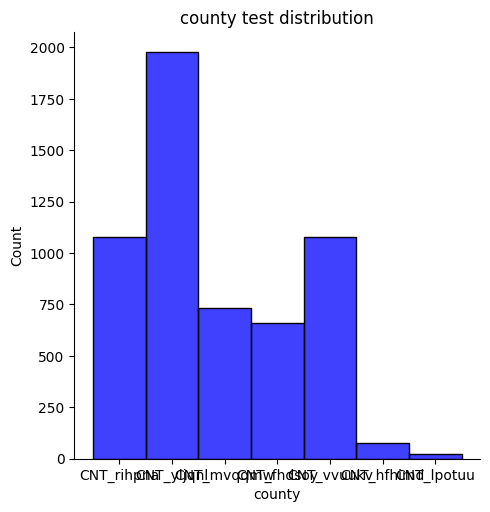

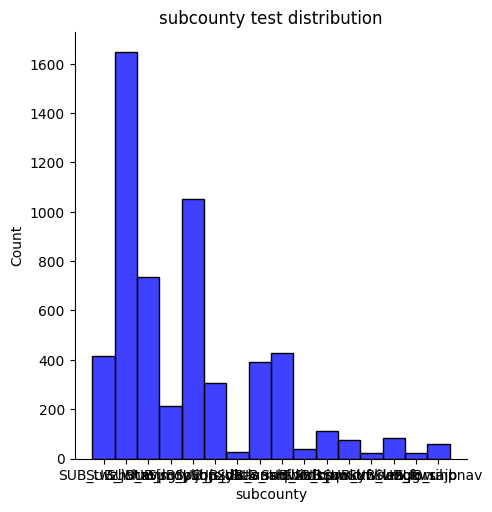

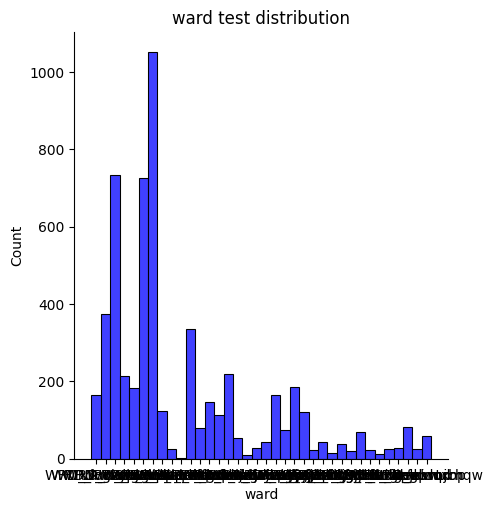

In [58]:
for col in cols:
    sns.displot(test_df[col], color='blue')
    plt.title(f'{col} test distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.show()

##### Train and test have similar feature distributions, good

In [59]:
prior_ids = prior_df['ID'].tolist()
test_ids = test_df['ID'].tolist()

In [60]:
len(prior_ids), prior_df.shape, len(test_ids), test_df.shape

(44882, (44882, 17), 5621, (5621, 14))

In [61]:
p = set(prior_ids)
t = set(test_ids)

common_ids = p.intersection(t)

In [62]:
len(common_ids)

0

#### From my analysis, there doesnt seem to be any overlap in IDs between the prior vs train, and prior vs test datasets

In [63]:
prior_df.ID.duplicated().value_counts()

ID
False    44882
Name: count, dtype: int64

## Base models
- LightGBM, SVM, CatBoost, XGBoost

In [64]:
concatenated_df.sample(2)

,ID,farmer_name,training_day,gender,registration,age,group_name,belong_to_cooperative,county,subcounty,ward,adopted_within_07_days,adopted_within_90_days,adopted_within_120_days,has_topic_trained_on,trainer,topics_list
39289,ID_JBGXWG,FAR_psbtlem,2024-10-06,Female,Ussd,Above 35,GRP_lfionyd,0,CNT_rihpna,SUB_twzhvtx,WRD_wdjchnle,0,0,0,1,TRA_ubcgvofe,['Some Reasons Why Ai Fails And Solutions']
42577,ID_J2UZNR,FAR_uiedhas,2024-11-11,Female,Ussd,Above 35,GRP_agfainw,0,CNT_vvuukv,SUB_dhaaasn,WRD_emtehozd,0,0,0,1,TRA_gertumxc,['Deworming And Record Keeping In Animal Health']


#### Features

In [65]:
cat_cols = ['gender', 'registration', 'age', 'trainer', 'county', 'subcounty', 'ward']

In [66]:
for col in cat_cols:
    concatenated_df[col] = concatenated_df[col].astype("category")

In [67]:
concatenated_df.dtypes

ID                                 object
farmer_name                        object
training_day               datetime64[ns]
gender                           category
registration                     category
age                              category
group_name                         object
belong_to_cooperative               int64
county                           category
subcounty                        category
ward                             category
adopted_within_07_days              int64
adopted_within_90_days              int64
adopted_within_120_days             int64
has_topic_trained_on                int64
trainer                          category
topics_list                        object
dtype: object

In [68]:
#topic_cols   = list(mlb.classes_)
numeric_cols = ['belong_to_cooperative', 'has_topic_trained_on'] #+ topic_cols
feature_cols = cat_cols + numeric_cols

In [69]:
feature_cols

['gender',
 'registration',
 'age',
 'trainer',
 'county',
 'subcounty',
 'ward',
 'belong_to_cooperative',
 'has_topic_trained_on']

In [70]:
y_cols = ['adopted_within_07_days', 'adopted_within_90_days', 'adopted_within_120_days']

In [71]:
X = concatenated_df[feature_cols]
Y = concatenated_df[y_cols]

In [72]:
X.shape, Y.shape

((58418, 9), (58418, 3))

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score, log_loss
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [74]:
np.random.seed(42)

In [75]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40892, 9), (17526, 9), (40892, 3), (17526, 3))

In [77]:
print("🟩 Training XGBoost base model ...")
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    eval_metric='auc',
    enable_categorical=True,
    random_state=42
)

🟩 Training XGBoost base model ...


In [78]:
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,True
,eval_metric,'auc'


In [79]:
y_pred_proba = xgb_model.predict_proba(X_test)

In [80]:
auc_score = roc_auc_score(y_test, y_pred_proba)
log_loss_val = log_loss(y_test, y_pred_proba)
print(f"📊 Model Evaluation:")
print(f"AUC Score: {auc_score:.4f}")
print(f"Log Loss:  {log_loss_val:.4f}")


📊 Model Evaluation:
AUC Score: 0.8339
Log Loss:  0.2268


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


#### Bruno ensembles

In [154]:
from sklearn.preprocessing import MultiLabelBinarizer
from catboost import CatBoostClassifier

In [155]:
# ── 2. Parse topics ───────────────────────────────────────────────────────────
def parse_topics(s):
    try:
        parsed = ast.literal_eval(s)
        if isinstance(parsed, list):
            flat = []
            for item in parsed:
                if isinstance(item, list): flat.extend(item)
                else: flat.append(item)
            return flat
    except:
        return []

full_train = pd.concat([prior_df, train_df], ignore_index=True)

mlb = MultiLabelBinarizer()
topics_train = pd.DataFrame(
    mlb.fit_transform(full_train['topics_list'].apply(parse_topics)),
    columns=mlb.classes_, index=full_train.index
)
topics_test = pd.DataFrame(
    mlb.transform(test_df['topics_list'].apply(parse_topics)),
    columns=mlb.classes_, index=test_df.index
)
full_train = pd.concat([full_train, topics_train], axis=1).drop(columns=['topics_list'])
test_df    = pd.concat([test_df, topics_test],     axis=1).drop(columns=['topics_list'])

KeyError: 'topics_list'

### Why a temporal split?

In [ ]:
# ── 3. Temporal split ─────────────────────────────────────────────────────────
full_train['dt'] = pd.to_datetime(full_train['training_day'])
test_df['dt']    = pd.to_datetime(test_df['training_day'])

prior_encoded = full_train.iloc[:len(prior_df)].copy()
train_encoded = full_train.iloc[len(prior_df):].copy()

cutoff = pd.Timestamp('2025-03-01')
df_val = train_encoded[train_encoded['dt'] >= cutoff].copy()
df_tr  = pd.concat([prior_encoded, train_encoded[train_encoded['dt'] < cutoff]], ignore_index=True)
print(f"Train: {len(df_tr):,} | Val: {len(df_val):,}")

In [ ]:
# ── 4. Features ───────────────────────────────────────────────────────────────
cat_cols     = ['gender', 'registration', 'age', 'trainer', 'county', 'subcounty', 'ward']
topic_cols   = list(mlb.classes_)
numeric_cols = ['belong_to_cooperative', 'has_topic_trained_on'] + topic_cols
feature_cols = cat_cols + numeric_cols

def prep_lgb(df):
    X = df[feature_cols].copy()
    for c in cat_cols:
        X[c] = X[c].astype('category')
    return X

X_tr_lgb   = prep_lgb(df_tr)
X_val_lgb  = prep_lgb(df_val)
X_test_lgb = prep_lgb(test_df)

X_tr_cat   = df_tr[feature_cols].fillna('missing')
X_val_cat  = df_val[feature_cols].fillna('missing')
X_test_cat = test_df[feature_cols].fillna('missing')

cat_feature_indices = [feature_cols.index(c) for c in cat_cols]
targets = ['07', '90', '120']


In [156]:
# ── 5. Optuna tuning ──────────────────────────────────────────────────────────
def tune_lgb(X_tr, y_tr, X_val, y_val, scale_pos):
    def objective(trial):
        params = {
            'objective':         'binary',
            'metric':            'binary_logloss',
            'scale_pos_weight':  scale_pos,
            'verbose':           -1,
            'seed':              42,
            'learning_rate':     trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
            'num_leaves':        trial.suggest_int('num_leaves', 16, 128),
            'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
            'feature_fraction':  trial.suggest_float('feature_fraction', 0.5, 1.0),
            'bagging_fraction':  trial.suggest_float('bagging_fraction', 0.5, 1.0),
            'bagging_freq':      trial.suggest_int('bagging_freq', 1, 10),
            'reg_alpha':         trial.suggest_float('reg_alpha', 1e-4, 10.0, log=True),
            'reg_lambda':        trial.suggest_float('reg_lambda', 1e-4, 10.0, log=True),
        }
        ds_tr  = lgb.Dataset(X_tr, label=y_tr)
        ds_val = lgb.Dataset(X_val, label=y_val, reference=ds_tr)
        model = lgb.train(
            params, ds_tr,
            num_boost_round=500,
            valid_sets=[ds_val],
            callbacks=[lgb.early_stopping(50, verbose=False), lgb.log_evaluation(0)]
        )
        return log_loss(y_val, model.predict(X_val))
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50, show_progress_bar=True)
    return study.best_params


In [157]:

def tune_cat(X_tr, y_tr, X_val, y_val, cat_feature_indices):
    def objective(trial):
        model = CatBoostClassifier(
            iterations=1000, random_seed=42, verbose=0,
            cat_features=cat_feature_indices,
            early_stopping_rounds=50,
            loss_function='Logloss', eval_metric='Logloss',
            learning_rate=      trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
            depth=              trial.suggest_int('depth', 4, 8),
            l2_leaf_reg=        trial.suggest_float('l2_leaf_reg', 1.0, 20.0),
            bagging_temperature=trial.suggest_float('bagging_temperature', 0.0, 2.0),
            random_strength=    trial.suggest_float('random_strength', 0.0, 2.0),
            border_count=       trial.suggest_int('border_count', 32, 255),
        )
        model.fit(X_tr, y_tr, eval_set=(X_val, y_val))
        return log_loss(y_val, model.predict_proba(X_val)[:, 1])
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=30, show_progress_bar=True)
    return study.best_params

In [158]:

def optimize_weight(cat_prob, lgb_prob, y_true):
    def objective(trial):
        w = trial.suggest_float('cat_weight', 0.0, 1.0)
        return log_loss(y_true, w * cat_prob + (1-w) * lgb_prob)
    study = optuna.create_study(direction='minimize',
        sampler=optuna.samplers.TPESampler(n_startup_trials=20, seed=42))
    study.optimize(objective, n_trials=100)
    return study.best_params['cat_weight']

In [159]:
best_params  = {}
best_weights = {}

In [160]:
for days in targets:
    col = f'adopted_within_{days}_days'
    y_tr  = df_tr[col].values
    y_val = df_val[col].values
    prevalence = y_tr.mean()
    scale_pos  = (1 - prevalence) / prevalence

    print(f"\n── Tuning {days}d ──")
    lgb_best = tune_lgb(X_tr_lgb, y_tr, X_val_lgb, y_val, scale_pos)
    cat_best = tune_cat(X_tr_cat, y_tr, X_val_cat, y_val, cat_feature_indices)
    best_params[days] = {'lgb': lgb_best, 'cat': cat_best}

    # retrain to get val probs for weight tuning
    ds_tr  = lgb.Dataset(X_tr_lgb, label=y_tr)
    ds_val = lgb.Dataset(X_val_lgb, label=y_val, reference=ds_tr)
    lgb_m  = lgb.train({'objective':'binary','metric':'binary_logloss',
                         'scale_pos_weight':scale_pos,'verbose':-1,'seed':42,**lgb_best},
                        ds_tr, num_boost_round=500, valid_sets=[ds_val],
                        callbacks=[lgb.early_stopping(50,verbose=False),lgb.log_evaluation(0)])
    cat_m  = CatBoostClassifier(iterations=1000, loss_function='Logloss',
                                 cat_features=cat_feature_indices, early_stopping_rounds=50,
                                 random_seed=42, verbose=0, **cat_best)
    cat_m.fit(X_tr_cat, y_tr, eval_set=(X_val_cat, y_val))

    best_weights[days] = optimize_weight(cat_m.predict_proba(X_val_cat)[:,1],
                                          lgb_m.predict(X_val_lgb), y_val)
    print(f"CAT weight: {best_weights[days]:.3f}")

[I 2026-02-24 18:02:21,131] A new study created in memory with name: no-name-1d0d7c95-8b09-44b6-a9f9-208d921e5393



── Tuning 07d ──


Best trial: 1. Best value: 0.0585844:   4%|▍         | 2/50 [00:00<00:08,  5.34it/s]

[I 2026-02-24 18:02:21,382] Trial 0 finished with value: 0.059870029550903904 and parameters: {'learning_rate': 0.03952922111596876, 'num_leaves': 56, 'min_child_samples': 48, 'feature_fraction': 0.6948214179576071, 'bagging_fraction': 0.6483984549720332, 'bagging_freq': 4, 'reg_alpha': 0.04700130366799631, 'reg_lambda': 0.09078653959901013}. Best is trial 0 with value: 0.059870029550903904.
[I 2026-02-24 18:02:21,526] Trial 1 finished with value: 0.058584374214216896 and parameters: {'learning_rate': 0.029512395601242313, 'num_leaves': 77, 'min_child_samples': 43, 'feature_fraction': 0.5473363954342696, 'bagging_fraction': 0.7407649791376579, 'bagging_freq': 5, 'reg_alpha': 0.22806696519960445, 'reg_lambda': 0.412122860748359}. Best is trial 1 with value: 0.058584374214216896.


Best trial: 3. Best value: 0.0580652:   8%|▊         | 4/50 [00:00<00:07,  6.20it/s]

[I 2026-02-24 18:02:21,683] Trial 2 finished with value: 0.07864486102136047 and parameters: {'learning_rate': 0.06425704481782611, 'num_leaves': 49, 'min_child_samples': 73, 'feature_fraction': 0.9889502226300456, 'bagging_fraction': 0.8378180335002281, 'bagging_freq': 5, 'reg_alpha': 8.139846734341678, 'reg_lambda': 0.00022921547502568126}. Best is trial 1 with value: 0.058584374214216896.
[I 2026-02-24 18:02:21,826] Trial 3 finished with value: 0.05806519106363895 and parameters: {'learning_rate': 0.03618892026054397, 'num_leaves': 94, 'min_child_samples': 44, 'feature_fraction': 0.8453925967234399, 'bagging_fraction': 0.6053577117623785, 'bagging_freq': 3, 'reg_alpha': 1.8963965727497647, 'reg_lambda': 0.05063779543339345}. Best is trial 3 with value: 0.05806519106363895.


Best trial: 3. Best value: 0.0580652:  12%|█▏        | 6/50 [00:01<00:07,  6.21it/s]

[I 2026-02-24 18:02:22,014] Trial 4 finished with value: 0.11483944187136969 and parameters: {'learning_rate': 0.07697654299497513, 'num_leaves': 98, 'min_child_samples': 25, 'feature_fraction': 0.6522213312598695, 'bagging_fraction': 0.5719283840628582, 'bagging_freq': 8, 'reg_alpha': 6.438937582098277, 'reg_lambda': 0.005694978118743595}. Best is trial 3 with value: 0.05806519106363895.
[I 2026-02-24 18:02:22,156] Trial 5 finished with value: 0.06544770824351571 and parameters: {'learning_rate': 0.05413267353149726, 'num_leaves': 89, 'min_child_samples': 99, 'feature_fraction': 0.8867836235724964, 'bagging_fraction': 0.6190933251264072, 'bagging_freq': 4, 'reg_alpha': 3.333059150545394, 'reg_lambda': 0.005847445027896453}. Best is trial 3 with value: 0.05806519106363895.


Best trial: 3. Best value: 0.0580652:  16%|█▌        | 8/50 [00:01<00:06,  6.20it/s]

[I 2026-02-24 18:02:22,323] Trial 6 finished with value: 0.058819079599574095 and parameters: {'learning_rate': 0.012529212231204344, 'num_leaves': 57, 'min_child_samples': 87, 'feature_fraction': 0.713452255826987, 'bagging_fraction': 0.8178188224164484, 'bagging_freq': 1, 'reg_alpha': 0.4127207181421737, 'reg_lambda': 0.0006821230825844527}. Best is trial 3 with value: 0.05806519106363895.
[I 2026-02-24 18:02:22,481] Trial 7 finished with value: 0.059122993291808305 and parameters: {'learning_rate': 0.026889625362125254, 'num_leaves': 55, 'min_child_samples': 23, 'feature_fraction': 0.8085161655548064, 'bagging_fraction': 0.9025490950982431, 'bagging_freq': 7, 'reg_alpha': 0.025380734050209738, 'reg_lambda': 2.9111994501796348}. Best is trial 3 with value: 0.05806519106363895.


Best trial: 3. Best value: 0.0580652:  18%|█▊        | 9/50 [00:01<00:07,  5.52it/s]

[I 2026-02-24 18:02:22,705] Trial 8 finished with value: 0.07955752771923233 and parameters: {'learning_rate': 0.0637808884980027, 'num_leaves': 88, 'min_child_samples': 90, 'feature_fraction': 0.7976645427163915, 'bagging_fraction': 0.8681232541429531, 'bagging_freq': 2, 'reg_alpha': 0.00011885950061822872, 'reg_lambda': 0.00016336597862933597}. Best is trial 3 with value: 0.05806519106363895.


Best trial: 3. Best value: 0.0580652:  22%|██▏       | 11/50 [00:01<00:06,  5.60it/s]

[I 2026-02-24 18:02:22,918] Trial 9 finished with value: 0.06288704400450386 and parameters: {'learning_rate': 0.046166374105216006, 'num_leaves': 116, 'min_child_samples': 36, 'feature_fraction': 0.6199727019194294, 'bagging_fraction': 0.8383440781504674, 'bagging_freq': 5, 'reg_alpha': 0.0004022481330746883, 'reg_lambda': 0.00038776152383516977}. Best is trial 3 with value: 0.05806519106363895.
[I 2026-02-24 18:02:23,068] Trial 10 finished with value: 0.05952939433895092 and parameters: {'learning_rate': 0.015232382230650246, 'num_leaves': 21, 'min_child_samples': 63, 'feature_fraction': 0.9247284128903456, 'bagging_fraction': 0.5119490337292308, 'bagging_freq': 10, 'reg_alpha': 0.003506199440828079, 'reg_lambda': 8.386545586553734}. Best is trial 3 with value: 0.05806519106363895.


Best trial: 3. Best value: 0.0580652:  26%|██▌       | 13/50 [00:02<00:06,  5.89it/s]

[I 2026-02-24 18:02:23,233] Trial 11 finished with value: 0.05930393216558619 and parameters: {'learning_rate': 0.02479101596648702, 'num_leaves': 126, 'min_child_samples': 46, 'feature_fraction': 0.5511474996200803, 'bagging_fraction': 0.7072150102927742, 'bagging_freq': 3, 'reg_alpha': 0.42893049937713756, 'reg_lambda': 0.32725993796128555}. Best is trial 3 with value: 0.05806519106363895.
[I 2026-02-24 18:02:23,392] Trial 12 finished with value: 0.06035281326478548 and parameters: {'learning_rate': 0.020541451573831474, 'num_leaves': 78, 'min_child_samples': 10, 'feature_fraction': 0.5399199870082442, 'bagging_fraction': 0.9965374726836563, 'bagging_freq': 7, 'reg_alpha': 0.4149982891283679, 'reg_lambda': 0.42065742569036085}. Best is trial 3 with value: 0.05806519106363895.


Best trial: 13. Best value: 0.0577244:  30%|███       | 15/50 [00:02<00:05,  6.15it/s]

[I 2026-02-24 18:02:23,556] Trial 13 finished with value: 0.05772440061187167 and parameters: {'learning_rate': 0.03446602637333913, 'num_leaves': 103, 'min_child_samples': 61, 'feature_fraction': 0.7976201799927267, 'bagging_fraction': 0.719605954036565, 'bagging_freq': 3, 'reg_alpha': 0.05642291759840349, 'reg_lambda': 0.04492490895001034}. Best is trial 13 with value: 0.05772440061187167.
[I 2026-02-24 18:02:23,706] Trial 14 finished with value: 0.060023722503705794 and parameters: {'learning_rate': 0.04004029571563772, 'num_leaves': 110, 'min_child_samples': 65, 'feature_fraction': 0.8246592364333817, 'bagging_fraction': 0.6574702855169161, 'bagging_freq': 1, 'reg_alpha': 0.005123223634096703, 'reg_lambda': 0.01220514596666088}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244:  34%|███▍      | 17/50 [00:02<00:05,  6.01it/s]

[I 2026-02-24 18:02:23,850] Trial 15 finished with value: 0.058758138658938766 and parameters: {'learning_rate': 0.0189418865806054, 'num_leaves': 104, 'min_child_samples': 60, 'feature_fraction': 0.8648492968452756, 'bagging_fraction': 0.5589596996493402, 'bagging_freq': 3, 'reg_alpha': 1.6060924804331111, 'reg_lambda': 0.051217920950392765}. Best is trial 13 with value: 0.05772440061187167.
[I 2026-02-24 18:02:24,038] Trial 16 finished with value: 0.16982175691198068 and parameters: {'learning_rate': 0.09344096701259322, 'num_leaves': 125, 'min_child_samples': 77, 'feature_fraction': 0.7567742452372898, 'bagging_fraction': 0.7064834921431391, 'bagging_freq': 3, 'reg_alpha': 0.057644819274627876, 'reg_lambda': 0.0023053710486703257}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244:  38%|███▊      | 19/50 [00:03<00:05,  6.10it/s]

[I 2026-02-24 18:02:24,227] Trial 17 finished with value: 0.05827422867173238 and parameters: {'learning_rate': 0.03707709179667786, 'num_leaves': 93, 'min_child_samples': 52, 'feature_fraction': 0.9565038319123718, 'bagging_fraction': 0.7638725405537375, 'bagging_freq': 2, 'reg_alpha': 0.0020107868038474566, 'reg_lambda': 0.12330731057169413}. Best is trial 13 with value: 0.05772440061187167.
[I 2026-02-24 18:02:24,369] Trial 18 finished with value: 0.058652630800333665 and parameters: {'learning_rate': 0.010559618577795, 'num_leaves': 68, 'min_child_samples': 33, 'feature_fraction': 0.875952806559169, 'bagging_fraction': 0.5723263822082142, 'bagging_freq': 6, 'reg_alpha': 1.3892473842192867, 'reg_lambda': 0.021398375226924983}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244:  42%|████▏     | 21/50 [00:03<00:04,  6.44it/s]

[I 2026-02-24 18:02:24,522] Trial 19 finished with value: 0.05811783737154627 and parameters: {'learning_rate': 0.03460602305872643, 'num_leaves': 27, 'min_child_samples': 76, 'feature_fraction': 0.7599652189650689, 'bagging_fraction': 0.5006137913500032, 'bagging_freq': 2, 'reg_alpha': 0.01328029184529166, 'reg_lambda': 1.7159860359835462}. Best is trial 13 with value: 0.05772440061187167.
[I 2026-02-24 18:02:24,665] Trial 20 finished with value: 0.05793459693158649 and parameters: {'learning_rate': 0.022008054453966475, 'num_leaves': 112, 'min_child_samples': 57, 'feature_fraction': 0.8424108977966178, 'bagging_fraction': 0.6241103335921767, 'bagging_freq': 4, 'reg_alpha': 0.14326970018704235, 'reg_lambda': 0.0021654208491204315}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244:  46%|████▌     | 23/50 [00:03<00:04,  6.37it/s]

[I 2026-02-24 18:02:24,826] Trial 21 finished with value: 0.05795916250741 and parameters: {'learning_rate': 0.02106169458328291, 'num_leaves': 116, 'min_child_samples': 56, 'feature_fraction': 0.8398018767917235, 'bagging_fraction': 0.640085667794874, 'bagging_freq': 4, 'reg_alpha': 0.12468773942995219, 'reg_lambda': 0.0015855251731215958}. Best is trial 13 with value: 0.05772440061187167.
[I 2026-02-24 18:02:24,984] Trial 22 finished with value: 0.058582483308644344 and parameters: {'learning_rate': 0.020746752078730762, 'num_leaves': 118, 'min_child_samples': 55, 'feature_fraction': 0.9107956625020063, 'bagging_fraction': 0.6833756841206505, 'bagging_freq': 4, 'reg_alpha': 0.12972874066276627, 'reg_lambda': 0.0015392080544269643}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244:  50%|█████     | 25/50 [00:04<00:03,  6.32it/s]

[I 2026-02-24 18:02:25,156] Trial 23 finished with value: 0.05869961158628491 and parameters: {'learning_rate': 0.015999010614306714, 'num_leaves': 108, 'min_child_samples': 69, 'feature_fraction': 0.7837193560807225, 'bagging_fraction': 0.7508438103560606, 'bagging_freq': 6, 'reg_alpha': 0.12713161811304707, 'reg_lambda': 0.0016340086541958467}. Best is trial 13 with value: 0.05772440061187167.
[I 2026-02-24 18:02:25,306] Trial 24 finished with value: 0.058284804511093004 and parameters: {'learning_rate': 0.026893263502593436, 'num_leaves': 119, 'min_child_samples': 57, 'feature_fraction': 0.7224872759809947, 'bagging_fraction': 0.6315787887601655, 'bagging_freq': 4, 'reg_alpha': 0.016365212047544875, 'reg_lambda': 0.006788664703054326}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244:  54%|█████▍    | 27/50 [00:04<00:03,  6.30it/s]

[I 2026-02-24 18:02:25,459] Trial 25 finished with value: 0.05835654429867714 and parameters: {'learning_rate': 0.023586621206058835, 'num_leaves': 104, 'min_child_samples': 81, 'feature_fraction': 0.8289185763473764, 'bagging_fraction': 0.7748419407880689, 'bagging_freq': 4, 'reg_alpha': 0.09440764678540935, 'reg_lambda': 0.0007845509716326298}. Best is trial 13 with value: 0.05772440061187167.
[I 2026-02-24 18:02:25,623] Trial 26 finished with value: 0.05841942487736946 and parameters: {'learning_rate': 0.016535697348559135, 'num_leaves': 127, 'min_child_samples': 68, 'feature_fraction': 0.9275378390887609, 'bagging_fraction': 0.6819319977780081, 'bagging_freq': 2, 'reg_alpha': 0.009198218595431943, 'reg_lambda': 0.013442370772478668}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244:  58%|█████▊    | 29/50 [00:04<00:03,  6.36it/s]

[I 2026-02-24 18:02:25,786] Trial 27 finished with value: 0.059115844140073925 and parameters: {'learning_rate': 0.013367240139948727, 'num_leaves': 113, 'min_child_samples': 37, 'feature_fraction': 0.6713138589772579, 'bagging_fraction': 0.5960102319042503, 'bagging_freq': 6, 'reg_alpha': 0.039016305911887865, 'reg_lambda': 0.00011303068600082462}. Best is trial 13 with value: 0.05772440061187167.
[I 2026-02-24 18:02:25,937] Trial 28 finished with value: 0.05772760284147885 and parameters: {'learning_rate': 0.03103594958141582, 'num_leaves': 100, 'min_child_samples': 55, 'feature_fraction': 0.7814350230768301, 'bagging_fraction': 0.5397027931543293, 'bagging_freq': 10, 'reg_alpha': 0.7296837509459112, 'reg_lambda': 0.0024669417028918886}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244:  60%|██████    | 30/50 [00:04<00:03,  6.31it/s]

[I 2026-02-24 18:02:26,098] Trial 29 finished with value: 0.06064894136661503 and parameters: {'learning_rate': 0.04417322641509527, 'num_leaves': 83, 'min_child_samples': 50, 'feature_fraction': 0.7760988204752501, 'bagging_fraction': 0.5357185262990575, 'bagging_freq': 10, 'reg_alpha': 0.8032031737581371, 'reg_lambda': 0.13318188981901447}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244:  64%|██████▍   | 32/50 [00:05<00:03,  6.00it/s]

[I 2026-02-24 18:02:26,300] Trial 30 finished with value: 0.05826123642550112 and parameters: {'learning_rate': 0.03089640109596446, 'num_leaves': 99, 'min_child_samples': 62, 'feature_fraction': 0.7176362188452478, 'bagging_fraction': 0.547624634099729, 'bagging_freq': 9, 'reg_alpha': 0.04697261983302249, 'reg_lambda': 0.003359163382216688}. Best is trial 13 with value: 0.05772440061187167.
[I 2026-02-24 18:02:26,456] Trial 31 finished with value: 0.05837396700111997 and parameters: {'learning_rate': 0.02125487956417723, 'num_leaves': 103, 'min_child_samples': 56, 'feature_fraction': 0.8474154782469494, 'bagging_fraction': 0.6549613227796245, 'bagging_freq': 4, 'reg_alpha': 0.22680637682494312, 'reg_lambda': 0.0008566875452609536}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244:  68%|██████▊   | 34/50 [00:05<00:02,  6.39it/s]

[I 2026-02-24 18:02:26,615] Trial 32 finished with value: 0.058305902920565436 and parameters: {'learning_rate': 0.028973711447383137, 'num_leaves': 111, 'min_child_samples': 49, 'feature_fraction': 0.8110735264373133, 'bagging_fraction': 0.5957625274072242, 'bagging_freq': 5, 'reg_alpha': 0.2200756046126805, 'reg_lambda': 0.026564542230485468}. Best is trial 13 with value: 0.05772440061187167.
[I 2026-02-24 18:02:26,753] Trial 33 finished with value: 0.0583089064050327 and parameters: {'learning_rate': 0.032773505508934514, 'num_leaves': 68, 'min_child_samples': 41, 'feature_fraction': 0.8971822461832478, 'bagging_fraction': 0.6438628640650002, 'bagging_freq': 5, 'reg_alpha': 0.7088041006219398, 'reg_lambda': 0.0003390081913825184}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244:  70%|███████   | 35/50 [00:05<00:02,  5.68it/s]

[I 2026-02-24 18:02:26,974] Trial 34 finished with value: 0.05840224780045239 and parameters: {'learning_rate': 0.023192767434804883, 'num_leaves': 121, 'min_child_samples': 70, 'feature_fraction': 0.7488307141548107, 'bagging_fraction': 0.7099890940820618, 'bagging_freq': 3, 'reg_alpha': 0.07428861079847228, 'reg_lambda': 0.003920141750197263}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244:  74%|███████▍  | 37/50 [00:06<00:02,  5.41it/s]

[I 2026-02-24 18:02:27,249] Trial 35 finished with value: 0.06130263488105405 and parameters: {'learning_rate': 0.04900894585477328, 'num_leaves': 98, 'min_child_samples': 59, 'feature_fraction': 0.8482659984610326, 'bagging_fraction': 0.6718685924336913, 'bagging_freq': 8, 'reg_alpha': 0.1773941452643276, 'reg_lambda': 0.013007475122661717}. Best is trial 13 with value: 0.05772440061187167.
[I 2026-02-24 18:02:27,385] Trial 36 finished with value: 0.05913279238197409 and parameters: {'learning_rate': 0.017718244216932185, 'num_leaves': 39, 'min_child_samples': 52, 'feature_fraction': 0.7409782101867123, 'bagging_fraction': 0.5909953459781722, 'bagging_freq': 7, 'reg_alpha': 3.944694037561625, 'reg_lambda': 0.0661525843692748}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244:  78%|███████▊  | 39/50 [00:06<00:01,  5.65it/s]

[I 2026-02-24 18:02:27,590] Trial 37 finished with value: 0.05841247774805449 and parameters: {'learning_rate': 0.02777229642084744, 'num_leaves': 89, 'min_child_samples': 43, 'feature_fraction': 0.965468087826639, 'bagging_fraction': 0.6177926548578894, 'bagging_freq': 9, 'reg_alpha': 0.02501151495075681, 'reg_lambda': 0.0015621313360558173}. Best is trial 13 with value: 0.05772440061187167.
[I 2026-02-24 18:02:27,735] Trial 38 finished with value: 0.058331982091661856 and parameters: {'learning_rate': 0.0402352119997772, 'num_leaves': 78, 'min_child_samples': 29, 'feature_fraction': 0.7859350791103467, 'bagging_fraction': 0.5318982799709284, 'bagging_freq': 5, 'reg_alpha': 0.7986974430371251, 'reg_lambda': 0.010188609358270439}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244:  82%|████████▏ | 41/50 [00:06<00:01,  5.63it/s]

[I 2026-02-24 18:02:27,953] Trial 39 finished with value: 0.07791665422954108 and parameters: {'learning_rate': 0.05986634450201082, 'num_leaves': 106, 'min_child_samples': 85, 'feature_fraction': 0.6869930543439828, 'bagging_fraction': 0.7956212808873784, 'bagging_freq': 4, 'reg_alpha': 0.30532020353159667, 'reg_lambda': 0.0005017333749026745}. Best is trial 13 with value: 0.05772440061187167.
[I 2026-02-24 18:02:28,103] Trial 40 finished with value: 0.0579284651454996 and parameters: {'learning_rate': 0.03270117294098347, 'num_leaves': 94, 'min_child_samples': 66, 'feature_fraction': 0.8635852166409637, 'bagging_fraction': 0.7246837465037645, 'bagging_freq': 3, 'reg_alpha': 2.751068764421384, 'reg_lambda': 0.0002199877661602745}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244:  84%|████████▍ | 42/50 [00:07<00:01,  5.63it/s]

[I 2026-02-24 18:02:28,281] Trial 41 finished with value: 0.05788495302321205 and parameters: {'learning_rate': 0.03322182307465555, 'num_leaves': 96, 'min_child_samples': 65, 'feature_fraction': 0.8582374372760044, 'bagging_fraction': 0.7370713783025923, 'bagging_freq': 3, 'reg_alpha': 9.826358351851384, 'reg_lambda': 0.00018888201435240796}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244:  88%|████████▊ | 44/50 [00:07<00:01,  5.95it/s]

[I 2026-02-24 18:02:28,481] Trial 42 finished with value: 0.05808931726941054 and parameters: {'learning_rate': 0.03132783968729191, 'num_leaves': 93, 'min_child_samples': 74, 'feature_fraction': 0.8792401098599765, 'bagging_fraction': 0.7169059883129683, 'bagging_freq': 2, 'reg_alpha': 6.38357147080091, 'reg_lambda': 0.0002156432047700619}. Best is trial 13 with value: 0.05772440061187167.
[I 2026-02-24 18:02:28,611] Trial 43 finished with value: 0.05860467527912973 and parameters: {'learning_rate': 0.035622410435204824, 'num_leaves': 86, 'min_child_samples': 66, 'feature_fraction': 0.8099180914307605, 'bagging_fraction': 0.7385839882160785, 'bagging_freq': 3, 'reg_alpha': 9.73245466720187, 'reg_lambda': 0.00017652325980570873}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244:  92%|█████████▏| 46/50 [00:07<00:00,  6.08it/s]

[I 2026-02-24 18:02:28,770] Trial 44 finished with value: 0.05862171282186329 and parameters: {'learning_rate': 0.025468849665831402, 'num_leaves': 99, 'min_child_samples': 72, 'feature_fraction': 0.8591102016917194, 'bagging_fraction': 0.7917981306276396, 'bagging_freq': 1, 'reg_alpha': 3.1943731618603133, 'reg_lambda': 0.00031143914246502507}. Best is trial 13 with value: 0.05772440061187167.
[I 2026-02-24 18:02:28,933] Trial 45 finished with value: 0.0588447454797881 and parameters: {'learning_rate': 0.04280897991509955, 'num_leaves': 82, 'min_child_samples': 64, 'feature_fraction': 0.8973465458461534, 'bagging_fraction': 0.7327329839917583, 'bagging_freq': 2, 'reg_alpha': 2.551071405462145, 'reg_lambda': 0.0006782617393509938}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244:  96%|█████████▌| 48/50 [00:08<00:00,  6.01it/s]

[I 2026-02-24 18:02:29,090] Trial 46 finished with value: 0.0657568241577289 and parameters: {'learning_rate': 0.05343284485602556, 'num_leaves': 96, 'min_child_samples': 98, 'feature_fraction': 0.9353289597645591, 'bagging_fraction': 0.797793186958381, 'bagging_freq': 3, 'reg_alpha': 5.200929560199557, 'reg_lambda': 0.0001582071335861482}. Best is trial 13 with value: 0.05772440061187167.
[I 2026-02-24 18:02:29,266] Trial 47 finished with value: 0.058724778751099216 and parameters: {'learning_rate': 0.03019834531523773, 'num_leaves': 91, 'min_child_samples': 61, 'feature_fraction': 0.6234872750474265, 'bagging_fraction': 0.8674915249535792, 'bagging_freq': 3, 'reg_alpha': 1.1258485345152853, 'reg_lambda': 0.00010132325091184098}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 13. Best value: 0.0577244: 100%|██████████| 50/50 [00:08<00:00,  5.88it/s]
[I 2026-02-24 18:02:29,635] A new study created in memory with name: no-name-b5fa9c9c-d30f-4293-9d1e-96381e9f1056


[I 2026-02-24 18:02:29,444] Trial 48 finished with value: 0.059769908288894336 and parameters: {'learning_rate': 0.03955341622154503, 'num_leaves': 74, 'min_child_samples': 47, 'feature_fraction': 0.8225452571012754, 'bagging_fraction': 0.8274712815911577, 'bagging_freq': 3, 'reg_alpha': 2.224777114658837, 'reg_lambda': 0.29743578846494684}. Best is trial 13 with value: 0.05772440061187167.
[I 2026-02-24 18:02:29,632] Trial 49 finished with value: 0.061270672483328056 and parameters: {'learning_rate': 0.04900299915100039, 'num_leaves': 60, 'min_child_samples': 80, 'feature_fraction': 0.9909433987322844, 'bagging_fraction': 0.7630488719487794, 'bagging_freq': 1, 'reg_alpha': 0.41172081107612407, 'reg_lambda': 0.0326128870382124}. Best is trial 13 with value: 0.05772440061187167.


Best trial: 0. Best value: 0.0504438:   3%|▎         | 1/30 [00:15<07:37, 15.78s/it]

[I 2026-02-24 18:02:45,413] Trial 0 finished with value: 0.0504438165870208 and parameters: {'learning_rate': 0.05220589361830375, 'depth': 6, 'l2_leaf_reg': 4.918662108713956, 'bagging_temperature': 1.012233460684044, 'random_strength': 1.4603882694475396, 'border_count': 56}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:   7%|▋         | 2/30 [00:20<04:25,  9.50s/it]

[I 2026-02-24 18:02:50,517] Trial 1 finished with value: 0.052305859474537246 and parameters: {'learning_rate': 0.09096338259952788, 'depth': 5, 'l2_leaf_reg': 16.051563962965435, 'bagging_temperature': 1.2541552656636612, 'random_strength': 0.6231788552417303, 'border_count': 206}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  10%|█         | 3/30 [00:26<03:33,  7.90s/it]

[I 2026-02-24 18:02:56,504] Trial 2 finished with value: 0.05346033502338418 and parameters: {'learning_rate': 0.04977259613751949, 'depth': 5, 'l2_leaf_reg': 19.720911057147575, 'bagging_temperature': 1.7529939038875317, 'random_strength': 1.3141478760221006, 'border_count': 158}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  13%|█▎        | 4/30 [00:33<03:14,  7.49s/it]

[I 2026-02-24 18:03:03,363] Trial 3 finished with value: 0.05348629266690008 and parameters: {'learning_rate': 0.022998034030126513, 'depth': 4, 'l2_leaf_reg': 13.954070245997103, 'bagging_temperature': 1.332178762305004, 'random_strength': 0.19988284083884644, 'border_count': 219}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  17%|█▋        | 5/30 [00:50<04:34, 10.98s/it]

[I 2026-02-24 18:03:20,528] Trial 4 finished with value: 0.05268972223923373 and parameters: {'learning_rate': 0.013074569329331707, 'depth': 5, 'l2_leaf_reg': 1.4048471118842096, 'bagging_temperature': 0.6072629949732544, 'random_strength': 1.474295977733491, 'border_count': 248}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  20%|██        | 6/30 [00:55<03:35,  8.98s/it]

[I 2026-02-24 18:03:25,631] Trial 5 finished with value: 0.05300791422191949 and parameters: {'learning_rate': 0.030420709175996555, 'depth': 4, 'l2_leaf_reg': 15.256899732734755, 'bagging_temperature': 1.7896330892181824, 'random_strength': 0.7332375799391622, 'border_count': 153}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  23%|██▎       | 7/30 [01:20<05:19, 13.90s/it]

[I 2026-02-24 18:03:49,650] Trial 6 finished with value: 0.05265993726580753 and parameters: {'learning_rate': 0.011778530029010836, 'depth': 8, 'l2_leaf_reg': 9.799127062279398, 'bagging_temperature': 1.0668637447981175, 'random_strength': 0.7203684060828675, 'border_count': 135}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  27%|██▋       | 8/30 [01:32<04:55, 13.44s/it]

[I 2026-02-24 18:04:02,129] Trial 7 finished with value: 0.052370193457081375 and parameters: {'learning_rate': 0.025813363807398154, 'depth': 8, 'l2_leaf_reg': 1.2688167174941698, 'bagging_temperature': 0.15645537684012378, 'random_strength': 1.1462350010564453, 'border_count': 135}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  30%|███       | 9/30 [01:44<04:36, 13.15s/it]

[I 2026-02-24 18:04:14,622] Trial 8 finished with value: 0.05173067297278214 and parameters: {'learning_rate': 0.057107527482702945, 'depth': 6, 'l2_leaf_reg': 15.004399238396818, 'bagging_temperature': 0.23821221743212906, 'random_strength': 0.07049611556495794, 'border_count': 101}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  33%|███▎      | 10/30 [01:51<03:43, 11.18s/it]

[I 2026-02-24 18:04:21,399] Trial 9 finished with value: 0.052646227147708655 and parameters: {'learning_rate': 0.04687741653177811, 'depth': 8, 'l2_leaf_reg': 7.6463563717550205, 'bagging_temperature': 0.8154812559732121, 'random_strength': 0.11824989948120379, 'border_count': 46}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  37%|███▋      | 11/30 [01:54<02:45,  8.69s/it]

[I 2026-02-24 18:04:24,437] Trial 10 finished with value: 0.05141169466247205 and parameters: {'learning_rate': 0.0991601332571217, 'depth': 7, 'l2_leaf_reg': 4.654084047894291, 'bagging_temperature': 0.547067593292133, 'random_strength': 1.9854138738981875, 'border_count': 40}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  40%|████      | 12/30 [01:58<02:09,  7.19s/it]

[I 2026-02-24 18:04:28,211] Trial 11 finished with value: 0.05264675970925393 and parameters: {'learning_rate': 0.09693729753222757, 'depth': 7, 'l2_leaf_reg': 5.757422334107077, 'bagging_temperature': 0.5598875087071291, 'random_strength': 1.8756996581288687, 'border_count': 48}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  43%|████▎     | 13/30 [02:03<01:48,  6.36s/it]

[I 2026-02-24 18:04:32,665] Trial 12 finished with value: 0.052490266532054665 and parameters: {'learning_rate': 0.06670973894867945, 'depth': 7, 'l2_leaf_reg': 4.984137146972559, 'bagging_temperature': 0.5531581353057011, 'random_strength': 1.9571996036896195, 'border_count': 71}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  47%|████▋     | 14/30 [02:12<01:54,  7.18s/it]

[I 2026-02-24 18:04:41,720] Trial 13 finished with value: 0.051317876164380175 and parameters: {'learning_rate': 0.07053323971767965, 'depth': 6, 'l2_leaf_reg': 4.691560925058362, 'bagging_temperature': 0.8902541308027494, 'random_strength': 1.6433198589480582, 'border_count': 87}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  50%|█████     | 15/30 [02:18<01:45,  7.04s/it]

[I 2026-02-24 18:04:48,443] Trial 14 finished with value: 0.053403823453771655 and parameters: {'learning_rate': 0.04018770787388258, 'depth': 6, 'l2_leaf_reg': 9.401166656334906, 'bagging_temperature': 1.4340033199649058, 'random_strength': 1.6086927679889775, 'border_count': 92}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  53%|█████▎    | 16/30 [02:31<02:03,  8.85s/it]

[I 2026-02-24 18:05:01,502] Trial 15 finished with value: 0.05057857338607657 and parameters: {'learning_rate': 0.07176371952792222, 'depth': 6, 'l2_leaf_reg': 3.3082618872676006, 'bagging_temperature': 0.9303771364083978, 'random_strength': 1.6341662947235156, 'border_count': 101}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  57%|█████▋    | 17/30 [02:47<02:22, 10.97s/it]

[I 2026-02-24 18:05:17,385] Trial 16 finished with value: 0.0508160276628903 and parameters: {'learning_rate': 0.03865383331593865, 'depth': 5, 'l2_leaf_reg': 3.0637925354239557, 'bagging_temperature': 1.0747738243093978, 'random_strength': 1.0548665768405492, 'border_count': 110}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  60%|██████    | 18/30 [02:52<01:50,  9.23s/it]

[I 2026-02-24 18:05:22,570] Trial 17 finished with value: 0.05303245482693426 and parameters: {'learning_rate': 0.06853356823268206, 'depth': 7, 'l2_leaf_reg': 7.240258256760997, 'bagging_temperature': 1.6185477508101704, 'random_strength': 1.3282222058464843, 'border_count': 65}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  63%|██████▎   | 19/30 [03:07<02:00, 10.96s/it]

[I 2026-02-24 18:05:37,544] Trial 18 finished with value: 0.05268401717554969 and parameters: {'learning_rate': 0.018419971896801165, 'depth': 6, 'l2_leaf_reg': 3.0041560871031336, 'bagging_temperature': 1.987848483641649, 'random_strength': 1.7135120867057727, 'border_count': 116}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  67%|██████▋   | 20/30 [03:15<01:39,  9.95s/it]

[I 2026-02-24 18:05:45,148] Trial 19 finished with value: 0.05286709089241262 and parameters: {'learning_rate': 0.03605587366890371, 'depth': 6, 'l2_leaf_reg': 11.265849493075734, 'bagging_temperature': 0.7664618394612263, 'random_strength': 1.3936366981998243, 'border_count': 169}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 0. Best value: 0.0504438:  70%|███████   | 21/30 [03:21<01:18,  8.70s/it]

[I 2026-02-24 18:05:50,951] Trial 20 finished with value: 0.05270854714536081 and parameters: {'learning_rate': 0.05566783481951604, 'depth': 5, 'l2_leaf_reg': 7.413176659301456, 'bagging_temperature': 1.1592994736020954, 'random_strength': 0.9663406407045426, 'border_count': 68}. Best is trial 0 with value: 0.0504438165870208.


Best trial: 21. Best value: 0.0503696:  73%|███████▎  | 22/30 [03:41<01:38, 12.26s/it]

[I 2026-02-24 18:06:11,490] Trial 21 finished with value: 0.05036963197494902 and parameters: {'learning_rate': 0.04054698765397552, 'depth': 5, 'l2_leaf_reg': 3.065428662974586, 'bagging_temperature': 0.9568587155509323, 'random_strength': 1.080589493882697, 'border_count': 126}. Best is trial 21 with value: 0.05036963197494902.


Best trial: 22. Best value: 0.0503662:  77%|███████▋  | 23/30 [03:53<01:24, 12.01s/it]

[I 2026-02-24 18:06:22,930] Trial 22 finished with value: 0.0503662443516137 and parameters: {'learning_rate': 0.07887565728864813, 'depth': 6, 'l2_leaf_reg': 2.9430676026353115, 'bagging_temperature': 0.9167253299411046, 'random_strength': 1.1611194103395488, 'border_count': 178}. Best is trial 22 with value: 0.0503662443516137.


Best trial: 22. Best value: 0.0503662:  80%|████████  | 24/30 [04:03<01:08, 11.34s/it]

[I 2026-02-24 18:06:32,698] Trial 23 finished with value: 0.05168891774092977 and parameters: {'learning_rate': 0.04414874058501492, 'depth': 5, 'l2_leaf_reg': 2.321740360503852, 'bagging_temperature': 0.35152032492655705, 'random_strength': 1.1690613423653098, 'border_count': 185}. Best is trial 22 with value: 0.0503662443516137.


Best trial: 22. Best value: 0.0503662:  83%|████████▎ | 25/30 [04:08<00:47,  9.46s/it]

[I 2026-02-24 18:06:37,778] Trial 24 finished with value: 0.05269035620390358 and parameters: {'learning_rate': 0.0564883980065546, 'depth': 4, 'l2_leaf_reg': 6.230493449369693, 'bagging_temperature': 1.468161316606654, 'random_strength': 0.8623123218967135, 'border_count': 181}. Best is trial 22 with value: 0.0503662443516137.


Best trial: 22. Best value: 0.0503662:  87%|████████▋ | 26/30 [04:24<00:45, 11.39s/it]

[I 2026-02-24 18:06:53,667] Trial 25 finished with value: 0.05134538672407943 and parameters: {'learning_rate': 0.03179961859081536, 'depth': 6, 'l2_leaf_reg': 4.125505630771328, 'bagging_temperature': 0.7044417606655337, 'random_strength': 0.47684713340804175, 'border_count': 206}. Best is trial 22 with value: 0.0503662443516137.


Best trial: 22. Best value: 0.0503662:  90%|█████████ | 27/30 [04:27<00:26,  8.95s/it]

[I 2026-02-24 18:06:56,913] Trial 26 finished with value: 0.05324237825596157 and parameters: {'learning_rate': 0.08305068819032173, 'depth': 7, 'l2_leaf_reg': 11.82190694018126, 'bagging_temperature': 0.9943412649867203, 'random_strength': 1.2013101443071463, 'border_count': 122}. Best is trial 22 with value: 0.0503662443516137.


Best trial: 27. Best value: 0.0500689:  93%|█████████▎| 28/30 [04:39<00:19,  9.85s/it]

[I 2026-02-24 18:07:08,876] Trial 27 finished with value: 0.05006886659690989 and parameters: {'learning_rate': 0.0582046151638551, 'depth': 5, 'l2_leaf_reg': 1.0848043910686893, 'bagging_temperature': 0.016401500525788038, 'random_strength': 0.9841421933492444, 'border_count': 231}. Best is trial 27 with value: 0.05006886659690989.


Best trial: 27. Best value: 0.0500689:  97%|█████████▋| 29/30 [04:48<00:09,  9.73s/it]

[I 2026-02-24 18:07:18,311] Trial 28 finished with value: 0.05107006413777174 and parameters: {'learning_rate': 0.08220316839656787, 'depth': 4, 'l2_leaf_reg': 1.543072716697282, 'bagging_temperature': 0.028403035738872123, 'random_strength': 0.8884645123435813, 'border_count': 253}. Best is trial 27 with value: 0.05006886659690989.


Best trial: 27. Best value: 0.0500689: 100%|██████████| 30/30 [04:58<00:00,  9.96s/it]


[I 2026-02-24 18:07:28,293] Trial 29 finished with value: 0.051281977796891365 and parameters: {'learning_rate': 0.055682596395431, 'depth': 5, 'l2_leaf_reg': 8.435081903322748, 'bagging_temperature': 0.4010997757772403, 'random_strength': 0.4073736280003508, 'border_count': 234}. Best is trial 27 with value: 0.05006886659690989.


[I 2026-02-24 18:07:39,911] A new study created in memory with name: no-name-5b146be7-f305-4ac9-8cd4-6d44b0e30c93
[I 2026-02-24 18:07:39,914] Trial 0 finished with value: 0.053301649474946505 and parameters: {'cat_weight': 0.3745401188473625}. Best is trial 0 with value: 0.053301649474946505.
[I 2026-02-24 18:07:39,916] Trial 1 finished with value: 0.04994209402141837 and parameters: {'cat_weight': 0.9507143064099162}. Best is trial 1 with value: 0.04994209402141837.
[I 2026-02-24 18:07:39,917] Trial 2 finished with value: 0.05043448491936938 and parameters: {'cat_weight': 0.7319939418114051}. Best is trial 1 with value: 0.04994209402141837.
[I 2026-02-24 18:07:39,919] Trial 3 finished with value: 0.051287048593392635 and parameters: {'cat_weight': 0.5986584841970366}. Best is trial 1 with value: 0.04994209402141837.
[I 2026-02-24 18:07:39,920] Trial 4 finished with value: 0.05575558632897911 and parameters: {'cat_weight': 0.15601864044243652}. Best is trial 1 with value: 0.04994209402

CAT weight: 0.916

── Tuning 90d ──


Best trial: 1. Best value: 0.0716109:   4%|▍         | 2/50 [00:00<00:13,  3.50it/s]

[I 2026-02-24 18:07:40,650] Trial 0 finished with value: 0.07345030077573346 and parameters: {'learning_rate': 0.0905728248263569, 'num_leaves': 110, 'min_child_samples': 44, 'feature_fraction': 0.8553170431814565, 'bagging_fraction': 0.6289314139148193, 'bagging_freq': 2, 'reg_alpha': 0.037031015660821426, 'reg_lambda': 0.0016954015522860342}. Best is trial 0 with value: 0.07345030077573346.
[I 2026-02-24 18:07:40,795] Trial 1 finished with value: 0.07161093209714976 and parameters: {'learning_rate': 0.04246508406662449, 'num_leaves': 59, 'min_child_samples': 36, 'feature_fraction': 0.7509914704536697, 'bagging_fraction': 0.591833846704125, 'bagging_freq': 7, 'reg_alpha': 0.0006782403832246872, 'reg_lambda': 6.353770595063007}. Best is trial 1 with value: 0.07161093209714976.


Best trial: 1. Best value: 0.0716109:   6%|▌         | 3/50 [00:01<00:24,  1.91it/s]

[I 2026-02-24 18:07:41,599] Trial 2 finished with value: 0.07172314955072676 and parameters: {'learning_rate': 0.06788215451218711, 'num_leaves': 109, 'min_child_samples': 84, 'feature_fraction': 0.8419902700840752, 'bagging_fraction': 0.5094412730982577, 'bagging_freq': 3, 'reg_alpha': 0.004842343712304061, 'reg_lambda': 0.005641028099956737}. Best is trial 1 with value: 0.07161093209714976.


Best trial: 1. Best value: 0.0716109:  10%|█         | 5/50 [00:01<00:15,  2.97it/s]

[I 2026-02-24 18:07:41,860] Trial 3 finished with value: 0.0719715293131511 and parameters: {'learning_rate': 0.06272476304273887, 'num_leaves': 112, 'min_child_samples': 96, 'feature_fraction': 0.8251353324946253, 'bagging_fraction': 0.9586326437169252, 'bagging_freq': 3, 'reg_alpha': 0.0003552615093749898, 'reg_lambda': 0.0006851052427829225}. Best is trial 1 with value: 0.07161093209714976.
[I 2026-02-24 18:07:42,052] Trial 4 finished with value: 0.07168904182570382 and parameters: {'learning_rate': 0.019266563114562825, 'num_leaves': 57, 'min_child_samples': 65, 'feature_fraction': 0.722834153735188, 'bagging_fraction': 0.8466086136846116, 'bagging_freq': 3, 'reg_alpha': 0.24685444288701017, 'reg_lambda': 0.00016495991693736456}. Best is trial 1 with value: 0.07161093209714976.


Best trial: 1. Best value: 0.0716109:  14%|█▍        | 7/50 [00:02<00:10,  3.92it/s]

[I 2026-02-24 18:07:42,230] Trial 5 finished with value: 0.07898434634068431 and parameters: {'learning_rate': 0.09153869889990848, 'num_leaves': 98, 'min_child_samples': 85, 'feature_fraction': 0.6149007662469512, 'bagging_fraction': 0.5252258886822958, 'bagging_freq': 10, 'reg_alpha': 1.627304009945552, 'reg_lambda': 0.013377961097399032}. Best is trial 1 with value: 0.07161093209714976.
[I 2026-02-24 18:07:42,427] Trial 6 finished with value: 0.07218168313162508 and parameters: {'learning_rate': 0.032191973601621515, 'num_leaves': 89, 'min_child_samples': 22, 'feature_fraction': 0.6137671237822067, 'bagging_fraction': 0.7311571969178481, 'bagging_freq': 7, 'reg_alpha': 0.3733507850969942, 'reg_lambda': 0.08316600845243197}. Best is trial 1 with value: 0.07161093209714976.


Best trial: 1. Best value: 0.0716109:  18%|█▊        | 9/50 [00:03<00:13,  3.08it/s]

[I 2026-02-24 18:07:43,126] Trial 7 finished with value: 0.0716165362443899 and parameters: {'learning_rate': 0.03876388839347824, 'num_leaves': 48, 'min_child_samples': 52, 'feature_fraction': 0.6587481690993348, 'bagging_fraction': 0.5447114588840369, 'bagging_freq': 2, 'reg_alpha': 0.030399480347641093, 'reg_lambda': 0.5952028414282428}. Best is trial 1 with value: 0.07161093209714976.
[I 2026-02-24 18:07:43,293] Trial 8 finished with value: 0.07188690262941527 and parameters: {'learning_rate': 0.030232331272739638, 'num_leaves': 25, 'min_child_samples': 43, 'feature_fraction': 0.5502018422693993, 'bagging_fraction': 0.7104723805154645, 'bagging_freq': 8, 'reg_alpha': 0.01837277462461502, 'reg_lambda': 4.665608602740356}. Best is trial 1 with value: 0.07161093209714976.


Best trial: 9. Best value: 0.0714389:  20%|██        | 10/50 [00:03<00:11,  3.56it/s]

[I 2026-02-24 18:07:43,476] Trial 9 finished with value: 0.07143891533125445 and parameters: {'learning_rate': 0.03122684655747363, 'num_leaves': 105, 'min_child_samples': 38, 'feature_fraction': 0.5976423484898534, 'bagging_fraction': 0.5526633211240886, 'bagging_freq': 5, 'reg_alpha': 0.007652571272423752, 'reg_lambda': 0.0012442300847383045}. Best is trial 9 with value: 0.07143891533125445.


Best trial: 9. Best value: 0.0714389:  24%|██▍       | 12/50 [00:03<00:09,  3.92it/s]

[I 2026-02-24 18:07:43,820] Trial 10 finished with value: 0.07227674517649833 and parameters: {'learning_rate': 0.010414693534641589, 'num_leaves': 81, 'min_child_samples': 11, 'feature_fraction': 0.9958310825404273, 'bagging_fraction': 0.8280455789737102, 'bagging_freq': 5, 'reg_alpha': 0.0001129656485976091, 'reg_lambda': 0.09933249951398407}. Best is trial 9 with value: 0.07143891533125445.
[I 2026-02-24 18:07:43,972] Trial 11 finished with value: 0.07272481275816899 and parameters: {'learning_rate': 0.019691352522290886, 'num_leaves': 64, 'min_child_samples': 29, 'feature_fraction': 0.5257651421744877, 'bagging_fraction': 0.6178139526143285, 'bagging_freq': 6, 'reg_alpha': 0.0012544596736502628, 'reg_lambda': 7.521059709846448}. Best is trial 9 with value: 0.07143891533125445.


Best trial: 9. Best value: 0.0714389:  28%|██▊       | 14/50 [00:04<00:08,  4.27it/s]

[I 2026-02-24 18:07:44,245] Trial 12 finished with value: 0.07159055667938734 and parameters: {'learning_rate': 0.04771018726272918, 'num_leaves': 37, 'min_child_samples': 33, 'feature_fraction': 0.7312161968454987, 'bagging_fraction': 0.6265911281556079, 'bagging_freq': 5, 'reg_alpha': 0.002082797333396858, 'reg_lambda': 0.49103936032317963}. Best is trial 9 with value: 0.07143891533125445.
[I 2026-02-24 18:07:44,419] Trial 13 finished with value: 0.0719529925065889 and parameters: {'learning_rate': 0.022127615254631788, 'num_leaves': 127, 'min_child_samples': 59, 'feature_fraction': 0.7179239545111519, 'bagging_fraction': 0.6643798605083046, 'bagging_freq': 5, 'reg_alpha': 0.004157836935654504, 'reg_lambda': 0.37351967722347884}. Best is trial 9 with value: 0.07143891533125445.


Best trial: 14. Best value: 0.0713011:  32%|███▏      | 16/50 [00:04<00:07,  4.85it/s]

[I 2026-02-24 18:07:44,617] Trial 14 finished with value: 0.07130111486815584 and parameters: {'learning_rate': 0.05348978196196057, 'num_leaves': 17, 'min_child_samples': 17, 'feature_fraction': 0.6538999228772102, 'bagging_fraction': 0.6757536613370835, 'bagging_freq': 4, 'reg_alpha': 0.0044712626839461455, 'reg_lambda': 0.00011643508040159377}. Best is trial 14 with value: 0.07130111486815584.
[I 2026-02-24 18:07:44,783] Trial 15 finished with value: 0.07347407030987445 and parameters: {'learning_rate': 0.013022480040326762, 'num_leaves': 27, 'min_child_samples': 10, 'feature_fraction': 0.5999217588279805, 'bagging_fraction': 0.7928805276792376, 'bagging_freq': 1, 'reg_alpha': 8.582094654807834, 'reg_lambda': 0.00011440462379301273}. Best is trial 14 with value: 0.07130111486815584.


Best trial: 14. Best value: 0.0713011:  34%|███▍      | 17/50 [00:04<00:07,  4.58it/s]

[I 2026-02-24 18:07:45,030] Trial 16 finished with value: 0.0723194300383773 and parameters: {'learning_rate': 0.05436479929392854, 'num_leaves': 17, 'min_child_samples': 22, 'feature_fraction': 0.648722367758758, 'bagging_fraction': 0.5693054120518077, 'bagging_freq': 4, 'reg_alpha': 0.008984457906699356, 'reg_lambda': 0.0006195663176385489}. Best is trial 14 with value: 0.07130111486815584.


Best trial: 14. Best value: 0.0713011:  36%|███▌      | 18/50 [00:05<00:07,  4.54it/s]

[I 2026-02-24 18:07:45,254] Trial 17 finished with value: 0.07166617012510076 and parameters: {'learning_rate': 0.02770886170944203, 'num_leaves': 76, 'min_child_samples': 20, 'feature_fraction': 0.5158457694689175, 'bagging_fraction': 0.6904924761663557, 'bagging_freq': 9, 'reg_alpha': 0.0941161497811442, 'reg_lambda': 0.002697933699711685}. Best is trial 14 with value: 0.07130111486815584.


Best trial: 14. Best value: 0.0713011:  38%|███▊      | 19/50 [00:05<00:06,  4.46it/s]

[I 2026-02-24 18:07:45,487] Trial 18 finished with value: 0.07161735664079724 and parameters: {'learning_rate': 0.036972193980876665, 'num_leaves': 95, 'min_child_samples': 68, 'feature_fraction': 0.570220340266851, 'bagging_fraction': 0.9315594475282496, 'bagging_freq': 6, 'reg_alpha': 0.00021219158845028468, 'reg_lambda': 0.0003969993827951541}. Best is trial 14 with value: 0.07130111486815584.


Best trial: 14. Best value: 0.0713011:  40%|████      | 20/50 [00:05<00:06,  4.29it/s]

[I 2026-02-24 18:07:45,742] Trial 19 finished with value: 0.07367527593267693 and parameters: {'learning_rate': 0.07258158416698554, 'num_leaves': 128, 'min_child_samples': 44, 'feature_fraction': 0.6853350272433697, 'bagging_fraction': 0.7625318154696561, 'bagging_freq': 4, 'reg_alpha': 0.1129574100740688, 'reg_lambda': 0.011815863064885052}. Best is trial 14 with value: 0.07130111486815584.


Best trial: 14. Best value: 0.0713011:  42%|████▏     | 21/50 [00:05<00:06,  4.25it/s]

[I 2026-02-24 18:07:45,983] Trial 20 finished with value: 0.07220139508640215 and parameters: {'learning_rate': 0.023577650065565538, 'num_leaves': 42, 'min_child_samples': 26, 'feature_fraction': 0.7984459665463393, 'bagging_fraction': 0.6672992558861264, 'bagging_freq': 4, 'reg_alpha': 0.008150761623777458, 'reg_lambda': 0.0016584577826948984}. Best is trial 14 with value: 0.07130111486815584.


Best trial: 22. Best value: 0.0710323:  46%|████▌     | 23/50 [00:06<00:06,  4.45it/s]

[I 2026-02-24 18:07:46,253] Trial 21 finished with value: 0.07153741962462976 and parameters: {'learning_rate': 0.047854615672497346, 'num_leaves': 36, 'min_child_samples': 35, 'feature_fraction': 0.7818867547316736, 'bagging_fraction': 0.6282044131561975, 'bagging_freq': 5, 'reg_alpha': 0.0013575531213308677, 'reg_lambda': 1.034588837935547}. Best is trial 14 with value: 0.07130111486815584.
[I 2026-02-24 18:07:46,428] Trial 22 finished with value: 0.07103229661067212 and parameters: {'learning_rate': 0.05150543400598004, 'num_leaves': 18, 'min_child_samples': 39, 'feature_fraction': 0.8965079222367895, 'bagging_fraction': 0.5952818235252318, 'bagging_freq': 7, 'reg_alpha': 0.0009648397834381625, 'reg_lambda': 0.0002644008958698896}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  48%|████▊     | 24/50 [00:06<00:05,  4.34it/s]

[I 2026-02-24 18:07:46,672] Trial 23 finished with value: 0.07251763655744123 and parameters: {'learning_rate': 0.057558097893592904, 'num_leaves': 20, 'min_child_samples': 55, 'feature_fraction': 0.9204558292637308, 'bagging_fraction': 0.5798048017286977, 'bagging_freq': 7, 'reg_alpha': 0.002663431602204719, 'reg_lambda': 0.0002845647309160453}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  50%|█████     | 25/50 [00:06<00:06,  3.99it/s]

[I 2026-02-24 18:07:46,969] Trial 24 finished with value: 0.07207153349974492 and parameters: {'learning_rate': 0.074248204971276, 'num_leaves': 33, 'min_child_samples': 16, 'feature_fraction': 0.9326721203894911, 'bagging_fraction': 0.5013314567450847, 'bagging_freq': 8, 'reg_alpha': 0.0004708716191725637, 'reg_lambda': 0.00010032978779837686}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  52%|█████▏    | 26/50 [00:07<00:06,  3.65it/s]

[I 2026-02-24 18:07:47,298] Trial 25 finished with value: 0.07235483956976449 and parameters: {'learning_rate': 0.03453330264371996, 'num_leaves': 49, 'min_child_samples': 38, 'feature_fraction': 0.89341206735564, 'bagging_fraction': 0.5581128599548321, 'bagging_freq': 8, 'reg_alpha': 0.017340880442528694, 'reg_lambda': 0.000995605961481849}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  54%|█████▍    | 27/50 [00:07<00:07,  3.26it/s]

[I 2026-02-24 18:07:47,680] Trial 26 finished with value: 0.07200161854276767 and parameters: {'learning_rate': 0.04680553455796221, 'num_leaves': 67, 'min_child_samples': 28, 'feature_fraction': 0.9994570639044782, 'bagging_fraction': 0.6738799698197723, 'bagging_freq': 6, 'reg_alpha': 0.0009673564053650533, 'reg_lambda': 0.0003507166086447738}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  56%|█████▌    | 28/50 [00:07<00:06,  3.53it/s]

[I 2026-02-24 18:07:47,910] Trial 27 finished with value: 0.0715057237744503 and parameters: {'learning_rate': 0.025576400224398263, 'num_leaves': 28, 'min_child_samples': 48, 'feature_fraction': 0.6732982232270391, 'bagging_fraction': 0.5985997160391799, 'bagging_freq': 4, 'reg_alpha': 0.008330310781250436, 'reg_lambda': 0.004893065721694917}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  58%|█████▊    | 29/50 [00:07<00:05,  3.65it/s]

[I 2026-02-24 18:07:48,162] Trial 28 finished with value: 0.07311590246102069 and parameters: {'learning_rate': 0.016815196716737736, 'num_leaves': 16, 'min_child_samples': 71, 'feature_fraction': 0.5831821005570852, 'bagging_fraction': 0.7446486353283372, 'bagging_freq': 6, 'reg_alpha': 0.0034002886334905196, 'reg_lambda': 0.00020797171944142654}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  60%|██████    | 30/50 [00:08<00:05,  3.48it/s]

[I 2026-02-24 18:07:48,481] Trial 29 finished with value: 0.07238085627370568 and parameters: {'learning_rate': 0.08187874405502597, 'num_leaves': 115, 'min_child_samples': 41, 'feature_fraction': 0.6351039731531996, 'bagging_fraction': 0.5459994665582175, 'bagging_freq': 2, 'reg_alpha': 0.06586344834012406, 'reg_lambda': 0.00140003868726783}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  62%|██████▏   | 31/50 [00:08<00:05,  3.49it/s]

[I 2026-02-24 18:07:48,766] Trial 30 finished with value: 0.07168929252066504 and parameters: {'learning_rate': 0.0547123052285325, 'num_leaves': 102, 'min_child_samples': 49, 'feature_fraction': 0.8742024056862316, 'bagging_fraction': 0.6482714841481512, 'bagging_freq': 1, 'reg_alpha': 0.00021320132630671588, 'reg_lambda': 0.029119166346091484}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  64%|██████▍   | 32/50 [00:08<00:05,  3.49it/s]

[I 2026-02-24 18:07:49,052] Trial 31 finished with value: 0.07160186999962491 and parameters: {'learning_rate': 0.030152147795804635, 'num_leaves': 27, 'min_child_samples': 48, 'feature_fraction': 0.6858100743166552, 'bagging_fraction': 0.6045524182220555, 'bagging_freq': 4, 'reg_alpha': 0.010495651199422246, 'reg_lambda': 0.0037760188269465615}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  66%|██████▌   | 33/50 [00:09<00:04,  3.68it/s]

[I 2026-02-24 18:07:49,289] Trial 32 finished with value: 0.07159337521160142 and parameters: {'learning_rate': 0.02670475820181811, 'num_leaves': 24, 'min_child_samples': 35, 'feature_fraction': 0.6846000549131632, 'bagging_fraction': 0.5932753444254149, 'bagging_freq': 3, 'reg_alpha': 0.043008447783563074, 'reg_lambda': 0.006475295329832223}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  68%|██████▊   | 34/50 [00:09<00:04,  3.51it/s]

[I 2026-02-24 18:07:49,605] Trial 33 finished with value: 0.07234634663972714 and parameters: {'learning_rate': 0.03929748476827468, 'num_leaves': 33, 'min_child_samples': 57, 'feature_fraction': 0.765980989365085, 'bagging_fraction': 0.6411895641938613, 'bagging_freq': 4, 'reg_alpha': 0.006397415386377006, 'reg_lambda': 0.002600674883959948}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  72%|███████▏  | 36/50 [00:09<00:03,  3.91it/s]

[I 2026-02-24 18:07:49,895] Trial 34 finished with value: 0.07256707083264105 and parameters: {'learning_rate': 0.04294421150741682, 'num_leaves': 47, 'min_child_samples': 47, 'feature_fraction': 0.6533516794216497, 'bagging_fraction': 0.7050951358822065, 'bagging_freq': 7, 'reg_alpha': 0.01606164422932563, 'reg_lambda': 0.0007242679956699634}. Best is trial 22 with value: 0.07103229661067212.
[I 2026-02-24 18:07:50,079] Trial 35 finished with value: 0.07302869640522833 and parameters: {'learning_rate': 0.015981826373951853, 'num_leaves': 83, 'min_child_samples': 30, 'feature_fraction': 0.5477297469149999, 'bagging_fraction': 0.5883696545635613, 'bagging_freq': 5, 'reg_alpha': 0.0007268517393819845, 'reg_lambda': 0.0003607244461397441}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  76%|███████▌  | 38/50 [00:10<00:02,  4.32it/s]

[I 2026-02-24 18:07:50,319] Trial 36 finished with value: 0.07259132899717441 and parameters: {'learning_rate': 0.024883488423754204, 'num_leaves': 54, 'min_child_samples': 76, 'feature_fraction': 0.8333268162776636, 'bagging_fraction': 0.5444876023289276, 'bagging_freq': 3, 'reg_alpha': 0.002265532615655595, 'reg_lambda': 0.011911576579785354}. Best is trial 22 with value: 0.07103229661067212.
[I 2026-02-24 18:07:50,506] Trial 37 finished with value: 0.07113854473624005 and parameters: {'learning_rate': 0.0626786527728984, 'num_leaves': 120, 'min_child_samples': 40, 'feature_fraction': 0.7173524822862417, 'bagging_fraction': 0.5259728110526968, 'bagging_freq': 7, 'reg_alpha': 0.005455159161009171, 'reg_lambda': 0.0001832716752456613}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  78%|███████▊  | 39/50 [00:10<00:02,  3.96it/s]

[I 2026-02-24 18:07:50,806] Trial 38 finished with value: 0.07251930840726907 and parameters: {'learning_rate': 0.06705559341234996, 'num_leaves': 120, 'min_child_samples': 100, 'feature_fraction': 0.7129721469910365, 'bagging_fraction': 0.5220808187449385, 'bagging_freq': 7, 'reg_alpha': 0.00041258406462198877, 'reg_lambda': 0.0001768331476344103}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  80%|████████  | 40/50 [00:10<00:02,  3.83it/s]

[I 2026-02-24 18:07:51,088] Trial 39 finished with value: 0.07637645093453739 and parameters: {'learning_rate': 0.08448255051510045, 'num_leaves': 109, 'min_child_samples': 61, 'feature_fraction': 0.7435826687362903, 'bagging_fraction': 0.5248919537208436, 'bagging_freq': 9, 'reg_alpha': 0.033107467932320625, 'reg_lambda': 0.0005439250265670692}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  82%|████████▏ | 41/50 [00:11<00:02,  3.83it/s]

[I 2026-02-24 18:07:51,349] Trial 40 finished with value: 0.07559003817728734 and parameters: {'learning_rate': 0.09497695536119549, 'num_leaves': 101, 'min_child_samples': 41, 'feature_fraction': 0.624218376665556, 'bagging_fraction': 0.5646917992818064, 'bagging_freq': 9, 'reg_alpha': 0.0015945284609199706, 'reg_lambda': 0.00017202574235565042}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  86%|████████▌ | 43/50 [00:11<00:01,  4.26it/s]

[I 2026-02-24 18:07:51,618] Trial 41 finished with value: 0.07126553302238546 and parameters: {'learning_rate': 0.06205967515992149, 'num_leaves': 21, 'min_child_samples': 52, 'feature_fraction': 0.6735858819772236, 'bagging_fraction': 0.59082312732173, 'bagging_freq': 3, 'reg_alpha': 0.0048491175629911554, 'reg_lambda': 0.0009887687134753989}. Best is trial 22 with value: 0.07103229661067212.
[I 2026-02-24 18:07:51,786] Trial 42 finished with value: 0.07162454417333952 and parameters: {'learning_rate': 0.06062096886883588, 'num_leaves': 21, 'min_child_samples': 39, 'feature_fraction': 0.7044144005347114, 'bagging_fraction': 0.5401584477317094, 'bagging_freq': 3, 'reg_alpha': 0.004772613226910573, 'reg_lambda': 0.0009805655490766837}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  88%|████████▊ | 44/50 [00:11<00:01,  4.28it/s]

[I 2026-02-24 18:07:52,017] Trial 43 finished with value: 0.07188584019187429 and parameters: {'learning_rate': 0.06214569391575393, 'num_leaves': 106, 'min_child_samples': 52, 'feature_fraction': 0.809581883900335, 'bagging_fraction': 0.509985115807935, 'bagging_freq': 7, 'reg_alpha': 0.0035680351395583378, 'reg_lambda': 0.00024678770568593205}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  90%|█████████ | 45/50 [00:12<00:01,  4.12it/s]

[I 2026-02-24 18:07:52,280] Trial 44 finished with value: 0.07212338264572543 and parameters: {'learning_rate': 0.05040057292449962, 'num_leaves': 114, 'min_child_samples': 15, 'feature_fraction': 0.602603280829742, 'bagging_fraction': 0.610028613039749, 'bagging_freq': 6, 'reg_alpha': 0.0131145754718029, 'reg_lambda': 0.0001137061634388802}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  92%|█████████▏| 46/50 [00:12<00:00,  4.13it/s]

[I 2026-02-24 18:07:52,520] Trial 45 finished with value: 0.0726768460933053 and parameters: {'learning_rate': 0.04206781580573691, 'num_leaves': 92, 'min_child_samples': 63, 'feature_fraction': 0.6451549098918881, 'bagging_fraction': 0.5710536411038908, 'bagging_freq': 3, 'reg_alpha': 0.024153993812765322, 'reg_lambda': 0.0004658746690630009}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  94%|█████████▍| 47/50 [00:12<00:00,  3.73it/s]

[I 2026-02-24 18:07:52,851] Trial 46 finished with value: 0.07293121026426024 and parameters: {'learning_rate': 0.07841755214076161, 'num_leaves': 120, 'min_child_samples': 53, 'feature_fraction': 0.7543939787057918, 'bagging_fraction': 0.6461586397090573, 'bagging_freq': 2, 'reg_alpha': 0.0007427040282389341, 'reg_lambda': 0.0011667098060433461}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  96%|█████████▌| 48/50 [00:12<00:00,  3.57it/s]

[I 2026-02-24 18:07:53,159] Trial 47 finished with value: 0.07237622008514116 and parameters: {'learning_rate': 0.06763167425949664, 'num_leaves': 123, 'min_child_samples': 24, 'feature_fraction': 0.5809336341010022, 'bagging_fraction': 0.5322106465810319, 'bagging_freq': 8, 'reg_alpha': 0.006296459207862525, 'reg_lambda': 0.002254973633201627}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323:  98%|█████████▊| 49/50 [00:13<00:00,  3.56it/s]

[I 2026-02-24 18:07:53,441] Trial 48 finished with value: 0.07121640952499056 and parameters: {'learning_rate': 0.05257701808631071, 'num_leaves': 41, 'min_child_samples': 32, 'feature_fraction': 0.9682562668947845, 'bagging_fraction': 0.9220112969040507, 'bagging_freq': 5, 'reg_alpha': 0.6686556061133101, 'reg_lambda': 0.0006524036704643119}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 22. Best value: 0.0710323: 100%|██████████| 50/50 [00:13<00:00,  3.68it/s]
[I 2026-02-24 18:07:53,764] A new study created in memory with name: no-name-6fd31c98-3a24-4ecd-b37a-e2f729b1043f


[I 2026-02-24 18:07:53,760] Trial 49 finished with value: 0.0720314593559691 and parameters: {'learning_rate': 0.05251806751793841, 'num_leaves': 39, 'min_child_samples': 19, 'feature_fraction': 0.9700556997727426, 'bagging_fraction': 0.9891150784395714, 'bagging_freq': 5, 'reg_alpha': 0.29532698575864436, 'reg_lambda': 0.0001580318019974753}. Best is trial 22 with value: 0.07103229661067212.


Best trial: 0. Best value: 0.051713:   3%|▎         | 1/30 [00:03<01:42,  3.53s/it]

[I 2026-02-24 18:07:57,295] Trial 0 finished with value: 0.05171304493425245 and parameters: {'learning_rate': 0.06466026854722438, 'depth': 6, 'l2_leaf_reg': 15.003962744997256, 'bagging_temperature': 1.6430310475770833, 'random_strength': 0.2762086364965346, 'border_count': 133}. Best is trial 0 with value: 0.05171304493425245.


Best trial: 0. Best value: 0.051713:   7%|▋         | 2/30 [00:07<01:39,  3.56s/it]

[I 2026-02-24 18:08:00,876] Trial 1 finished with value: 0.052563513051518906 and parameters: {'learning_rate': 0.07783099610761358, 'depth': 5, 'l2_leaf_reg': 6.993607469537287, 'bagging_temperature': 1.4355353040118644, 'random_strength': 1.0497680365891668, 'border_count': 175}. Best is trial 0 with value: 0.05171304493425245.


Best trial: 0. Best value: 0.051713:  10%|█         | 3/30 [00:16<02:50,  6.30s/it]

[I 2026-02-24 18:08:10,429] Trial 2 finished with value: 0.05259416073168047 and parameters: {'learning_rate': 0.021568718665377407, 'depth': 4, 'l2_leaf_reg': 7.269726068046764, 'bagging_temperature': 0.8611184333095105, 'random_strength': 1.8609713932694505, 'border_count': 41}. Best is trial 0 with value: 0.05171304493425245.


Best trial: 0. Best value: 0.051713:  13%|█▎        | 4/30 [00:19<02:12,  5.09s/it]

[I 2026-02-24 18:08:13,678] Trial 3 finished with value: 0.05355941909642427 and parameters: {'learning_rate': 0.07155653317426255, 'depth': 4, 'l2_leaf_reg': 5.61900472447101, 'bagging_temperature': 1.8183921892966601, 'random_strength': 1.919273340437153, 'border_count': 228}. Best is trial 0 with value: 0.05171304493425245.


Best trial: 0. Best value: 0.051713:  17%|█▋        | 5/30 [00:28<02:37,  6.32s/it]

[I 2026-02-24 18:08:22,161] Trial 4 finished with value: 0.053169798550478486 and parameters: {'learning_rate': 0.017339212207239798, 'depth': 7, 'l2_leaf_reg': 17.08467069266348, 'bagging_temperature': 0.3454923444407758, 'random_strength': 0.014274208321876536, 'border_count': 238}. Best is trial 0 with value: 0.05171304493425245.


Best trial: 0. Best value: 0.051713:  20%|██        | 6/30 [00:34<02:25,  6.08s/it]

[I 2026-02-24 18:08:27,787] Trial 5 finished with value: 0.05353305861530169 and parameters: {'learning_rate': 0.027547200311622663, 'depth': 4, 'l2_leaf_reg': 10.700444565062723, 'bagging_temperature': 1.965513104198993, 'random_strength': 1.4771657593134315, 'border_count': 194}. Best is trial 0 with value: 0.05171304493425245.


Best trial: 0. Best value: 0.051713:  23%|██▎       | 7/30 [00:40<02:25,  6.33s/it]

[I 2026-02-24 18:08:34,624] Trial 6 finished with value: 0.053192686158446585 and parameters: {'learning_rate': 0.03113455573855509, 'depth': 7, 'l2_leaf_reg': 2.635689918463215, 'bagging_temperature': 0.5665720877795035, 'random_strength': 1.348821040880579, 'border_count': 151}. Best is trial 0 with value: 0.05171304493425245.


Best trial: 0. Best value: 0.051713:  27%|██▋       | 8/30 [00:47<02:24,  6.58s/it]

[I 2026-02-24 18:08:41,743] Trial 7 finished with value: 0.05219957285538542 and parameters: {'learning_rate': 0.04304563650720576, 'depth': 5, 'l2_leaf_reg': 6.917293658038506, 'bagging_temperature': 1.8009513112264863, 'random_strength': 1.7781034834563996, 'border_count': 253}. Best is trial 0 with value: 0.05171304493425245.


Best trial: 0. Best value: 0.051713:  30%|███       | 9/30 [00:57<02:36,  7.47s/it]

[I 2026-02-24 18:08:51,161] Trial 8 finished with value: 0.053021217896372916 and parameters: {'learning_rate': 0.02193808690347718, 'depth': 4, 'l2_leaf_reg': 15.748497973756553, 'bagging_temperature': 0.17449026549735058, 'random_strength': 1.7284259326956264, 'border_count': 185}. Best is trial 0 with value: 0.05171304493425245.


Best trial: 9. Best value: 0.0514348:  33%|███▎      | 10/30 [01:01<02:07,  6.37s/it]

[I 2026-02-24 18:08:55,089] Trial 9 finished with value: 0.051434763934881396 and parameters: {'learning_rate': 0.06488218212042168, 'depth': 5, 'l2_leaf_reg': 14.82273551669897, 'bagging_temperature': 0.8481738318766618, 'random_strength': 0.12833836905290785, 'border_count': 228}. Best is trial 9 with value: 0.051434763934881396.


Best trial: 9. Best value: 0.0514348:  37%|███▋      | 11/30 [01:21<03:22, 10.64s/it]

[I 2026-02-24 18:09:15,412] Trial 10 finished with value: 0.05406474273633413 and parameters: {'learning_rate': 0.011903457593219972, 'depth': 8, 'l2_leaf_reg': 19.645028834300494, 'bagging_temperature': 1.158743935936533, 'random_strength': 0.569882981317074, 'border_count': 92}. Best is trial 9 with value: 0.051434763934881396.


Best trial: 9. Best value: 0.0514348:  40%|████      | 12/30 [01:25<02:31,  8.44s/it]

[I 2026-02-24 18:09:18,819] Trial 11 finished with value: 0.051919209084798204 and parameters: {'learning_rate': 0.05673743007030704, 'depth': 6, 'l2_leaf_reg': 13.517756716313812, 'bagging_temperature': 1.1751800289974388, 'random_strength': 0.04087888109763155, 'border_count': 104}. Best is trial 9 with value: 0.051434763934881396.


Best trial: 9. Best value: 0.0514348:  43%|████▎     | 13/30 [01:28<01:57,  6.94s/it]

[I 2026-02-24 18:09:22,305] Trial 12 finished with value: 0.05175505862501166 and parameters: {'learning_rate': 0.09597168557655207, 'depth': 6, 'l2_leaf_reg': 12.510595897596891, 'bagging_temperature': 0.7773622773715441, 'random_strength': 0.47035129193256553, 'border_count': 120}. Best is trial 9 with value: 0.051434763934881396.


Best trial: 9. Best value: 0.0514348:  47%|████▋     | 14/30 [01:34<01:46,  6.67s/it]

[I 2026-02-24 18:09:28,364] Trial 13 finished with value: 0.05272362427106778 and parameters: {'learning_rate': 0.04447749630846441, 'depth': 5, 'l2_leaf_reg': 15.57148844009706, 'bagging_temperature': 1.474412459614674, 'random_strength': 0.4468580100399115, 'border_count': 67}. Best is trial 9 with value: 0.051434763934881396.


Best trial: 9. Best value: 0.0514348:  50%|█████     | 15/30 [01:40<01:35,  6.36s/it]

[I 2026-02-24 18:09:34,005] Trial 14 finished with value: 0.052232697418169896 and parameters: {'learning_rate': 0.04945386041318327, 'depth': 7, 'l2_leaf_reg': 19.810207105066024, 'bagging_temperature': 1.4183714865718353, 'random_strength': 0.8074796329055361, 'border_count': 141}. Best is trial 9 with value: 0.051434763934881396.


Best trial: 9. Best value: 0.0514348:  53%|█████▎    | 16/30 [01:45<01:22,  5.89s/it]

[I 2026-02-24 18:09:38,810] Trial 15 finished with value: 0.052081843311959475 and parameters: {'learning_rate': 0.06408165533382512, 'depth': 6, 'l2_leaf_reg': 10.953892761327667, 'bagging_temperature': 0.5303680550404999, 'random_strength': 0.21191071266678244, 'border_count': 205}. Best is trial 9 with value: 0.051434763934881396.


Best trial: 16. Best value: 0.051096:  57%|█████▋    | 17/30 [01:49<01:12,  5.58s/it]

[I 2026-02-24 18:09:43,667] Trial 16 finished with value: 0.05109596712598936 and parameters: {'learning_rate': 0.09825611161441689, 'depth': 5, 'l2_leaf_reg': 14.1940091984788, 'bagging_temperature': 1.0948772576818322, 'random_strength': 0.2998063072426735, 'border_count': 146}. Best is trial 16 with value: 0.05109596712598936.


Best trial: 16. Best value: 0.051096:  60%|██████    | 18/30 [01:53<01:01,  5.10s/it]

[I 2026-02-24 18:09:47,649] Trial 17 finished with value: 0.052896155333276726 and parameters: {'learning_rate': 0.09595296225232045, 'depth': 5, 'l2_leaf_reg': 17.9251927516149, 'bagging_temperature': 0.9550981540594488, 'random_strength': 0.8141866933715209, 'border_count': 168}. Best is trial 16 with value: 0.05109596712598936.


Best trial: 16. Best value: 0.051096:  63%|██████▎   | 19/30 [01:56<00:46,  4.25s/it]

[I 2026-02-24 18:09:49,928] Trial 18 finished with value: 0.051855030843215445 and parameters: {'learning_rate': 0.0859761484012941, 'depth': 5, 'l2_leaf_reg': 13.316587046942123, 'bagging_temperature': 1.147551421464685, 'random_strength': 0.7047766317262958, 'border_count': 213}. Best is trial 16 with value: 0.05109596712598936.


Best trial: 16. Best value: 0.051096:  67%|██████▋   | 20/30 [02:01<00:44,  4.47s/it]

[I 2026-02-24 18:09:54,888] Trial 19 finished with value: 0.052329687400944354 and parameters: {'learning_rate': 0.038114132227806595, 'depth': 5, 'l2_leaf_reg': 10.022093457632037, 'bagging_temperature': 0.5585670536139443, 'random_strength': 1.1009004988075426, 'border_count': 79}. Best is trial 16 with value: 0.05109596712598936.


Best trial: 16. Best value: 0.051096:  70%|███████   | 21/30 [02:04<00:38,  4.26s/it]

[I 2026-02-24 18:09:58,653] Trial 20 finished with value: 0.05220300820422241 and parameters: {'learning_rate': 0.056232915466325285, 'depth': 6, 'l2_leaf_reg': 9.08092045820023, 'bagging_temperature': 0.7313301129745978, 'random_strength': 0.2079716770620742, 'border_count': 34}. Best is trial 16 with value: 0.05109596712598936.


Best trial: 16. Best value: 0.051096:  73%|███████▎  | 22/30 [02:07<00:30,  3.81s/it]

[I 2026-02-24 18:10:01,417] Trial 21 finished with value: 0.05304057705571825 and parameters: {'learning_rate': 0.06772779409332537, 'depth': 6, 'l2_leaf_reg': 14.699060794256146, 'bagging_temperature': 1.5549086879221696, 'random_strength': 0.3254930051105822, 'border_count': 132}. Best is trial 16 with value: 0.05109596712598936.


Best trial: 16. Best value: 0.051096:  77%|███████▋  | 23/30 [02:10<00:24,  3.48s/it]

[I 2026-02-24 18:10:04,136] Trial 22 finished with value: 0.05147130875955605 and parameters: {'learning_rate': 0.07993018207582069, 'depth': 5, 'l2_leaf_reg': 17.26573394119393, 'bagging_temperature': 1.2807961445579745, 'random_strength': 0.22360230413779694, 'border_count': 115}. Best is trial 16 with value: 0.05109596712598936.


Best trial: 16. Best value: 0.051096:  80%|████████  | 24/30 [02:13<00:20,  3.35s/it]

[I 2026-02-24 18:10:07,192] Trial 23 finished with value: 0.05150119643228129 and parameters: {'learning_rate': 0.09863723763259337, 'depth': 5, 'l2_leaf_reg': 17.56723580331733, 'bagging_temperature': 1.2364495972258356, 'random_strength': 0.09651248142243646, 'border_count': 158}. Best is trial 16 with value: 0.05109596712598936.


Best trial: 16. Best value: 0.051096:  83%|████████▎ | 25/30 [02:18<00:19,  3.91s/it]

[I 2026-02-24 18:10:12,390] Trial 24 finished with value: 0.05351904159519981 and parameters: {'learning_rate': 0.07614374172363172, 'depth': 4, 'l2_leaf_reg': 12.471651446510071, 'bagging_temperature': 0.9556394564198325, 'random_strength': 0.6309815561484402, 'border_count': 98}. Best is trial 16 with value: 0.05109596712598936.


Best trial: 16. Best value: 0.051096:  87%|████████▋ | 26/30 [02:22<00:15,  3.75s/it]

[I 2026-02-24 18:10:15,787] Trial 25 finished with value: 0.053515312202756134 and parameters: {'learning_rate': 0.0825512559858399, 'depth': 5, 'l2_leaf_reg': 16.513695640230257, 'bagging_temperature': 1.307217386071286, 'random_strength': 0.3947431202287141, 'border_count': 112}. Best is trial 16 with value: 0.05109596712598936.


Best trial: 16. Best value: 0.051096:  90%|█████████ | 27/30 [02:24<00:10,  3.49s/it]

[I 2026-02-24 18:10:18,676] Trial 26 finished with value: 0.05139146780564877 and parameters: {'learning_rate': 0.05285320221981135, 'depth': 5, 'l2_leaf_reg': 17.977470045051632, 'bagging_temperature': 1.030604218921937, 'random_strength': 0.19760350311978991, 'border_count': 50}. Best is trial 16 with value: 0.05109596712598936.


Best trial: 16. Best value: 0.051096:  93%|█████████▎| 28/30 [02:29<00:07,  3.93s/it]

[I 2026-02-24 18:10:23,633] Trial 27 finished with value: 0.05176856339633887 and parameters: {'learning_rate': 0.03681299907887866, 'depth': 4, 'l2_leaf_reg': 18.74300958528654, 'bagging_temperature': 1.016176865587863, 'random_strength': 0.5047107529751177, 'border_count': 66}. Best is trial 16 with value: 0.05109596712598936.


Best trial: 16. Best value: 0.051096:  97%|█████████▋| 29/30 [02:32<00:03,  3.58s/it]

[I 2026-02-24 18:10:26,386] Trial 28 finished with value: 0.05200828566736871 and parameters: {'learning_rate': 0.05304707667407093, 'depth': 5, 'l2_leaf_reg': 14.365060701087698, 'bagging_temperature': 0.6369554855484094, 'random_strength': 0.11887793895180306, 'border_count': 215}. Best is trial 16 with value: 0.05109596712598936.


Best trial: 16. Best value: 0.051096: 100%|██████████| 30/30 [02:35<00:00,  5.18s/it]


[I 2026-02-24 18:10:29,181] Trial 29 finished with value: 0.052845285685019984 and parameters: {'learning_rate': 0.06028203350310718, 'depth': 6, 'l2_leaf_reg': 11.948530378937562, 'bagging_temperature': 1.0292385887337951, 'random_strength': 0.3190050347525798, 'border_count': 60}. Best is trial 16 with value: 0.05109596712598936.


[I 2026-02-24 18:10:33,935] A new study created in memory with name: no-name-6fe93efd-524e-4456-ab64-e51c5a4a44bc
[I 2026-02-24 18:10:33,937] Trial 0 finished with value: 0.0627106694000299 and parameters: {'cat_weight': 0.3745401188473625}. Best is trial 0 with value: 0.0627106694000299.
[I 2026-02-24 18:10:33,938] Trial 1 finished with value: 0.05181160275876178 and parameters: {'cat_weight': 0.9507143064099162}. Best is trial 1 with value: 0.05181160275876178.
[I 2026-02-24 18:10:33,940] Trial 2 finished with value: 0.055538169736687536 and parameters: {'cat_weight': 0.7319939418114051}. Best is trial 1 with value: 0.05181160275876178.
[I 2026-02-24 18:10:33,941] Trial 3 finished with value: 0.05809644436668889 and parameters: {'cat_weight': 0.5986584841970366}. Best is trial 1 with value: 0.05181160275876178.
[I 2026-02-24 18:10:33,942] Trial 4 finished with value: 0.06748916495880236 and parameters: {'cat_weight': 0.15601864044243652}. Best is trial 1 with value: 0.051811602758761

CAT weight: 1.000

── Tuning 120d ──


Best trial: 0. Best value: 0.0828828:   2%|▏         | 1/50 [00:00<00:09,  5.37it/s]

[I 2026-02-24 18:10:34,430] Trial 0 finished with value: 0.08288277042904457 and parameters: {'learning_rate': 0.0193642562569936, 'num_leaves': 78, 'min_child_samples': 55, 'feature_fraction': 0.8829053386889355, 'bagging_fraction': 0.9067843151266737, 'bagging_freq': 3, 'reg_alpha': 0.06049349610198793, 'reg_lambda': 4.198498214545216}. Best is trial 0 with value: 0.08288277042904457.


Best trial: 0. Best value: 0.0828828:   4%|▍         | 2/50 [00:00<00:07,  6.41it/s]

[I 2026-02-24 18:10:34,565] Trial 1 finished with value: 0.08291971496880636 and parameters: {'learning_rate': 0.013981094756695386, 'num_leaves': 128, 'min_child_samples': 78, 'feature_fraction': 0.9163215170408305, 'bagging_fraction': 0.7498633918430616, 'bagging_freq': 1, 'reg_alpha': 0.05854692614242493, 'reg_lambda': 4.9257579091832}. Best is trial 0 with value: 0.08288277042904457.


Best trial: 0. Best value: 0.0828828:   8%|▊         | 4/50 [00:00<00:08,  5.52it/s]

[I 2026-02-24 18:10:34,778] Trial 2 finished with value: 0.08306448182189713 and parameters: {'learning_rate': 0.05164288920210297, 'num_leaves': 108, 'min_child_samples': 92, 'feature_fraction': 0.8510048091688973, 'bagging_fraction': 0.5334912236656286, 'bagging_freq': 2, 'reg_alpha': 0.001166876955691422, 'reg_lambda': 0.0012088861808344806}. Best is trial 0 with value: 0.08288277042904457.
[I 2026-02-24 18:10:34,958] Trial 3 finished with value: 0.08307180336093681 and parameters: {'learning_rate': 0.052956417679687375, 'num_leaves': 73, 'min_child_samples': 17, 'feature_fraction': 0.829806860884484, 'bagging_fraction': 0.983711786363088, 'bagging_freq': 7, 'reg_alpha': 0.09736407130964334, 'reg_lambda': 0.12372797730130773}. Best is trial 0 with value: 0.08288277042904457.


Best trial: 4. Best value: 0.0824651:  12%|█▏        | 6/50 [00:01<00:07,  5.50it/s]

[I 2026-02-24 18:10:35,125] Trial 4 finished with value: 0.08246508105482067 and parameters: {'learning_rate': 0.08839154114597383, 'num_leaves': 66, 'min_child_samples': 42, 'feature_fraction': 0.9163651295500074, 'bagging_fraction': 0.7706671011880802, 'bagging_freq': 1, 'reg_alpha': 0.009572080779598468, 'reg_lambda': 8.35409731763571}. Best is trial 4 with value: 0.08246508105482067.
[I 2026-02-24 18:10:35,318] Trial 5 finished with value: 0.08269659420988776 and parameters: {'learning_rate': 0.012231343342963195, 'num_leaves': 56, 'min_child_samples': 15, 'feature_fraction': 0.7382106161643269, 'bagging_fraction': 0.5183465788891459, 'bagging_freq': 5, 'reg_alpha': 0.015542706331087605, 'reg_lambda': 0.006425537360337099}. Best is trial 4 with value: 0.08246508105482067.


Best trial: 7. Best value: 0.0823485:  16%|█▌        | 8/50 [00:01<00:07,  5.85it/s]

[I 2026-02-24 18:10:35,485] Trial 6 finished with value: 0.08245826565586117 and parameters: {'learning_rate': 0.08211653240012626, 'num_leaves': 42, 'min_child_samples': 26, 'feature_fraction': 0.8780069248505928, 'bagging_fraction': 0.7130677154123564, 'bagging_freq': 8, 'reg_alpha': 0.021884473140122127, 'reg_lambda': 0.6167813047816982}. Best is trial 6 with value: 0.08245826565586117.
[I 2026-02-24 18:10:35,643] Trial 7 finished with value: 0.08234851458013139 and parameters: {'learning_rate': 0.019565546165820374, 'num_leaves': 78, 'min_child_samples': 49, 'feature_fraction': 0.9004752610519623, 'bagging_fraction': 0.6575449146674603, 'bagging_freq': 3, 'reg_alpha': 0.09860246965884353, 'reg_lambda': 0.02860121776300543}. Best is trial 7 with value: 0.08234851458013139.


Best trial: 7. Best value: 0.0823485:  20%|██        | 10/50 [00:01<00:06,  5.82it/s]

[I 2026-02-24 18:10:35,834] Trial 8 finished with value: 0.08259058093079143 and parameters: {'learning_rate': 0.022059798237385908, 'num_leaves': 105, 'min_child_samples': 69, 'feature_fraction': 0.9729387262806823, 'bagging_fraction': 0.5180286786299273, 'bagging_freq': 9, 'reg_alpha': 0.023270447885029, 'reg_lambda': 0.03376308883869225}. Best is trial 7 with value: 0.08234851458013139.
[I 2026-02-24 18:10:35,993] Trial 9 finished with value: 0.0826556363113218 and parameters: {'learning_rate': 0.08320222742935986, 'num_leaves': 108, 'min_child_samples': 71, 'feature_fraction': 0.6892487585991175, 'bagging_fraction': 0.688798401690884, 'bagging_freq': 6, 'reg_alpha': 0.5107698185324203, 'reg_lambda': 0.5834484470003456}. Best is trial 7 with value: 0.08234851458013139.


Best trial: 11. Best value: 0.0822197:  24%|██▍       | 12/50 [00:02<00:06,  5.77it/s]

[I 2026-02-24 18:10:36,141] Trial 10 finished with value: 0.0831351372647188 and parameters: {'learning_rate': 0.028428817161952648, 'num_leaves': 17, 'min_child_samples': 40, 'feature_fraction': 0.5823205407357442, 'bagging_fraction': 0.6232490034309877, 'bagging_freq': 4, 'reg_alpha': 7.276437256544748, 'reg_lambda': 0.00015728861395967138}. Best is trial 7 with value: 0.08234851458013139.
[I 2026-02-24 18:10:36,335] Trial 11 finished with value: 0.0822197045414761 and parameters: {'learning_rate': 0.043206293779532896, 'num_leaves': 39, 'min_child_samples': 33, 'feature_fraction': 0.7851152744996475, 'bagging_fraction': 0.6528935835552442, 'bagging_freq': 9, 'reg_alpha': 0.0003270888236772449, 'reg_lambda': 0.39035360060577595}. Best is trial 11 with value: 0.0822197045414761.


Best trial: 11. Best value: 0.0822197:  28%|██▊       | 14/50 [00:02<00:06,  5.98it/s]

[I 2026-02-24 18:10:36,489] Trial 12 finished with value: 0.08308560042569937 and parameters: {'learning_rate': 0.044378897537001555, 'num_leaves': 32, 'min_child_samples': 35, 'feature_fraction': 0.7836979610173489, 'bagging_fraction': 0.6231122720960082, 'bagging_freq': 10, 'reg_alpha': 0.0004890012155519255, 'reg_lambda': 0.020973332975677998}. Best is trial 11 with value: 0.0822197045414761.
[I 2026-02-24 18:10:36,656] Trial 13 finished with value: 0.08276986499200359 and parameters: {'learning_rate': 0.035477722372896495, 'num_leaves': 86, 'min_child_samples': 54, 'feature_fraction': 0.6408357273663436, 'bagging_fraction': 0.6438459080041185, 'bagging_freq': 4, 'reg_alpha': 0.002149039105304433, 'reg_lambda': 0.20345201924674244}. Best is trial 11 with value: 0.0822197045414761.


Best trial: 11. Best value: 0.0822197:  32%|███▏      | 16/50 [00:02<00:05,  5.78it/s]

[I 2026-02-24 18:10:36,842] Trial 14 finished with value: 0.08363561834069375 and parameters: {'learning_rate': 0.01959642848691888, 'num_leaves': 49, 'min_child_samples': 44, 'feature_fraction': 0.5093831355862084, 'bagging_fraction': 0.8371626000883096, 'bagging_freq': 6, 'reg_alpha': 0.0001529232923739901, 'reg_lambda': 0.0016748716332287076}. Best is trial 11 with value: 0.0822197045414761.
[I 2026-02-24 18:10:37,015] Trial 15 finished with value: 0.0828336437344063 and parameters: {'learning_rate': 0.029884384998248577, 'num_leaves': 28, 'min_child_samples': 28, 'feature_fraction': 0.7719846370044203, 'bagging_fraction': 0.5999086425643734, 'bagging_freq': 10, 'reg_alpha': 0.4492905326214336, 'reg_lambda': 0.05082033643121239}. Best is trial 11 with value: 0.0822197045414761.


Best trial: 17. Best value: 0.082038:  36%|███▌      | 18/50 [00:03<00:05,  5.74it/s] 

[I 2026-02-24 18:10:37,201] Trial 16 finished with value: 0.08248292467460691 and parameters: {'learning_rate': 0.01468641403353872, 'num_leaves': 87, 'min_child_samples': 62, 'feature_fraction': 0.9705744224525286, 'bagging_fraction': 0.8008491657903001, 'bagging_freq': 8, 'reg_alpha': 0.45955189508149596, 'reg_lambda': 1.0232713650210608}. Best is trial 11 with value: 0.0822197045414761.
[I 2026-02-24 18:10:37,369] Trial 17 finished with value: 0.08203803087081712 and parameters: {'learning_rate': 0.03934358334968415, 'num_leaves': 62, 'min_child_samples': 49, 'feature_fraction': 0.8066733607662252, 'bagging_fraction': 0.6790248392434305, 'bagging_freq': 4, 'reg_alpha': 0.003054938329894922, 'reg_lambda': 0.00829773961086303}. Best is trial 17 with value: 0.08203803087081712.


Best trial: 17. Best value: 0.082038:  40%|████      | 20/50 [00:03<00:05,  5.74it/s]

[I 2026-02-24 18:10:37,545] Trial 18 finished with value: 0.0826161494765671 and parameters: {'learning_rate': 0.05944809868151413, 'num_leaves': 60, 'min_child_samples': 29, 'feature_fraction': 0.7061463180888432, 'bagging_fraction': 0.5738005681396288, 'bagging_freq': 5, 'reg_alpha': 0.00012644439953723413, 'reg_lambda': 0.00489656955178109}. Best is trial 17 with value: 0.08203803087081712.
[I 2026-02-24 18:10:37,718] Trial 19 finished with value: 0.08266606888096055 and parameters: {'learning_rate': 0.037660056904410606, 'num_leaves': 41, 'min_child_samples': 10, 'feature_fraction': 0.801067265280249, 'bagging_fraction': 0.7115126049783218, 'bagging_freq': 8, 'reg_alpha': 0.0036959437631199055, 'reg_lambda': 0.0002883783248875411}. Best is trial 17 with value: 0.08203803087081712.


Best trial: 17. Best value: 0.082038:  44%|████▍     | 22/50 [00:03<00:05,  5.55it/s]

[I 2026-02-24 18:10:37,923] Trial 20 finished with value: 0.0825206664961196 and parameters: {'learning_rate': 0.0684008977018437, 'num_leaves': 26, 'min_child_samples': 88, 'feature_fraction': 0.6698565327080545, 'bagging_fraction': 0.8480974584282648, 'bagging_freq': 7, 'reg_alpha': 0.0006521214072141425, 'reg_lambda': 0.01009934607847906}. Best is trial 17 with value: 0.08203803087081712.
[I 2026-02-24 18:10:38,095] Trial 21 finished with value: 0.08221616313396986 and parameters: {'learning_rate': 0.02472931627992871, 'num_leaves': 53, 'min_child_samples': 48, 'feature_fraction': 0.8156835395422953, 'bagging_fraction': 0.6662706713406569, 'bagging_freq': 3, 'reg_alpha': 0.0052054708721759315, 'reg_lambda': 0.10073068032530923}. Best is trial 17 with value: 0.08203803087081712.


Best trial: 17. Best value: 0.082038:  48%|████▊     | 24/50 [00:04<00:04,  5.64it/s]

[I 2026-02-24 18:10:38,274] Trial 22 finished with value: 0.08218463541506385 and parameters: {'learning_rate': 0.027298258048487133, 'num_leaves': 47, 'min_child_samples': 61, 'feature_fraction': 0.8265122233634188, 'bagging_fraction': 0.6772602208160478, 'bagging_freq': 3, 'reg_alpha': 0.00478440583714679, 'reg_lambda': 0.12619339272438448}. Best is trial 17 with value: 0.08203803087081712.
[I 2026-02-24 18:10:38,446] Trial 23 finished with value: 0.08277984284505864 and parameters: {'learning_rate': 0.02441132301514676, 'num_leaves': 52, 'min_child_samples': 63, 'feature_fraction': 0.8279333129561532, 'bagging_fraction': 0.7420587435784415, 'bagging_freq': 3, 'reg_alpha': 0.004299637670995871, 'reg_lambda': 0.0760847842027631}. Best is trial 17 with value: 0.08203803087081712.


Best trial: 25. Best value: 0.0819476:  52%|█████▏    | 26/50 [00:04<00:04,  5.60it/s]

[I 2026-02-24 18:10:38,632] Trial 24 finished with value: 0.08276425438944335 and parameters: {'learning_rate': 0.026883466068111515, 'num_leaves': 65, 'min_child_samples': 62, 'feature_fraction': 0.747222577797393, 'bagging_fraction': 0.5744617437647742, 'bagging_freq': 2, 'reg_alpha': 0.0019355823259407552, 'reg_lambda': 0.0025513725412406}. Best is trial 17 with value: 0.08203803087081712.
[I 2026-02-24 18:10:38,806] Trial 25 finished with value: 0.08194758314590778 and parameters: {'learning_rate': 0.03776667676063326, 'num_leaves': 48, 'min_child_samples': 49, 'feature_fraction': 0.8455358935072145, 'bagging_fraction': 0.6931064733345708, 'bagging_freq': 4, 'reg_alpha': 0.007094402492419422, 'reg_lambda': 1.731354971445211}. Best is trial 25 with value: 0.08194758314590778.


Best trial: 25. Best value: 0.0819476:  56%|█████▌    | 28/50 [00:04<00:03,  5.87it/s]

[I 2026-02-24 18:10:38,974] Trial 26 finished with value: 0.0822083664749863 and parameters: {'learning_rate': 0.03413039709052123, 'num_leaves': 46, 'min_child_samples': 79, 'feature_fraction': 0.8572117773076774, 'bagging_fraction': 0.7022821703986984, 'bagging_freq': 4, 'reg_alpha': 0.007744309551551359, 'reg_lambda': 2.4795306635522087}. Best is trial 25 with value: 0.08194758314590778.
[I 2026-02-24 18:10:39,133] Trial 27 finished with value: 0.08262076086815383 and parameters: {'learning_rate': 0.04172028007411751, 'num_leaves': 17, 'min_child_samples': 53, 'feature_fraction': 0.9399542648215046, 'bagging_fraction': 0.7946423786998682, 'bagging_freq': 2, 'reg_alpha': 0.0018365716494221178, 'reg_lambda': 0.0007065388790144445}. Best is trial 25 with value: 0.08194758314590778.


Best trial: 25. Best value: 0.0819476:  60%|██████    | 30/50 [00:05<00:03,  5.93it/s]

[I 2026-02-24 18:10:39,293] Trial 28 finished with value: 0.08256711892904435 and parameters: {'learning_rate': 0.03319159150367146, 'num_leaves': 64, 'min_child_samples': 99, 'feature_fraction': 0.7307043465169094, 'bagging_fraction': 0.7291559225677033, 'bagging_freq': 5, 'reg_alpha': 0.000811630997457541, 'reg_lambda': 1.9123453431941893}. Best is trial 25 with value: 0.08194758314590778.
[I 2026-02-24 18:10:39,466] Trial 29 finished with value: 0.08247459347261774 and parameters: {'learning_rate': 0.05207853517665169, 'num_leaves': 78, 'min_child_samples': 60, 'feature_fraction': 0.8614272397427594, 'bagging_fraction': 0.6850099476247725, 'bagging_freq': 4, 'reg_alpha': 0.03506223615625996, 'reg_lambda': 0.014950711769088123}. Best is trial 25 with value: 0.08194758314590778.


Best trial: 25. Best value: 0.0819476:  64%|██████▍   | 32/50 [00:05<00:03,  5.83it/s]

[I 2026-02-24 18:10:39,667] Trial 30 finished with value: 0.08256908059283519 and parameters: {'learning_rate': 0.01699222605389787, 'num_leaves': 35, 'min_child_samples': 69, 'feature_fraction': 0.6213188288240421, 'bagging_fraction': 0.8971544065229075, 'bagging_freq': 2, 'reg_alpha': 0.20354797647828843, 'reg_lambda': 0.27552602532509435}. Best is trial 25 with value: 0.08194758314590778.
[I 2026-02-24 18:10:39,822] Trial 31 finished with value: 0.0820960472726444 and parameters: {'learning_rate': 0.032809064341456376, 'num_leaves': 44, 'min_child_samples': 82, 'feature_fraction': 0.8596640584318993, 'bagging_fraction': 0.6944224325528899, 'bagging_freq': 4, 'reg_alpha': 0.007439463394759372, 'reg_lambda': 2.045015350209001}. Best is trial 25 with value: 0.08194758314590778.


Best trial: 25. Best value: 0.0819476:  68%|██████▊   | 34/50 [00:05<00:02,  5.82it/s]

[I 2026-02-24 18:10:40,022] Trial 32 finished with value: 0.08251299445005052 and parameters: {'learning_rate': 0.03933550126819598, 'num_leaves': 48, 'min_child_samples': 81, 'feature_fraction': 0.8878104378410248, 'bagging_fraction': 0.7837647442393632, 'bagging_freq': 3, 'reg_alpha': 0.012595920800667045, 'reg_lambda': 1.5618501857490967}. Best is trial 25 with value: 0.08194758314590778.
[I 2026-02-24 18:10:40,175] Trial 33 finished with value: 0.08200018901154944 and parameters: {'learning_rate': 0.0315699530640277, 'num_leaves': 58, 'min_child_samples': 87, 'feature_fraction': 0.9340276537593276, 'bagging_fraction': 0.5962616494600721, 'bagging_freq': 4, 'reg_alpha': 0.0033560859791285772, 'reg_lambda': 3.531658107252258}. Best is trial 25 with value: 0.08194758314590778.


Best trial: 25. Best value: 0.0819476:  72%|███████▏  | 36/50 [00:06<00:02,  6.16it/s]

[I 2026-02-24 18:10:40,328] Trial 34 finished with value: 0.0828029347856557 and parameters: {'learning_rate': 0.047084341987453135, 'num_leaves': 59, 'min_child_samples': 87, 'feature_fraction': 0.9375513905822972, 'bagging_fraction': 0.5677059702197862, 'bagging_freq': 5, 'reg_alpha': 0.05150621990932774, 'reg_lambda': 4.697166588425279}. Best is trial 25 with value: 0.08194758314590778.
[I 2026-02-24 18:10:40,481] Trial 35 finished with value: 0.08454909613485355 and parameters: {'learning_rate': 0.0644520727718034, 'num_leaves': 68, 'min_child_samples': 97, 'feature_fraction': 0.9918721388179548, 'bagging_fraction': 0.6126791392389372, 'bagging_freq': 4, 'reg_alpha': 0.001386065440068677, 'reg_lambda': 9.836206179502371}. Best is trial 25 with value: 0.08194758314590778.


Best trial: 25. Best value: 0.0819476:  76%|███████▌  | 38/50 [00:06<00:01,  6.34it/s]

[I 2026-02-24 18:10:40,639] Trial 36 finished with value: 0.08257682525364615 and parameters: {'learning_rate': 0.032066643020366006, 'num_leaves': 77, 'min_child_samples': 73, 'feature_fraction': 0.9212453637357685, 'bagging_fraction': 0.7577538476414705, 'bagging_freq': 6, 'reg_alpha': 0.008053701107231963, 'reg_lambda': 5.11361555823294}. Best is trial 25 with value: 0.08194758314590778.
[I 2026-02-24 18:10:40,789] Trial 37 finished with value: 0.08257798513879515 and parameters: {'learning_rate': 0.04797436144825347, 'num_leaves': 57, 'min_child_samples': 93, 'feature_fraction': 0.8484814845861653, 'bagging_fraction': 0.7318236650986212, 'bagging_freq': 1, 'reg_alpha': 0.0034097078386829995, 'reg_lambda': 0.8512021198205506}. Best is trial 25 with value: 0.08194758314590778.


Best trial: 25. Best value: 0.0819476:  80%|████████  | 40/50 [00:06<00:01,  6.31it/s]

[I 2026-02-24 18:10:40,951] Trial 38 finished with value: 0.08204018599031702 and parameters: {'learning_rate': 0.038512408463632804, 'num_leaves': 89, 'min_child_samples': 82, 'feature_fraction': 0.8950666477493379, 'bagging_fraction': 0.5932709216616385, 'bagging_freq': 4, 'reg_alpha': 0.00029526164871001816, 'reg_lambda': 2.5620182024015126}. Best is trial 25 with value: 0.08194758314590778.
[I 2026-02-24 18:10:41,108] Trial 39 finished with value: 0.08263408038456957 and parameters: {'learning_rate': 0.057445660086464616, 'num_leaves': 96, 'min_child_samples': 76, 'feature_fraction': 0.9493978741095781, 'bagging_fraction': 0.5423860843448305, 'bagging_freq': 5, 'reg_alpha': 0.00024139804379885626, 'reg_lambda': 3.376236284642298}. Best is trial 25 with value: 0.08194758314590778.


Best trial: 25. Best value: 0.0819476:  84%|████████▍ | 42/50 [00:07<00:01,  6.34it/s]

[I 2026-02-24 18:10:41,274] Trial 40 finished with value: 0.0821226276843412 and parameters: {'learning_rate': 0.07250650052329616, 'num_leaves': 120, 'min_child_samples': 46, 'feature_fraction': 0.8991886076243288, 'bagging_fraction': 0.5013947975805595, 'bagging_freq': 2, 'reg_alpha': 0.0009862139951708772, 'reg_lambda': 7.18872078543466}. Best is trial 25 with value: 0.08194758314590778.
[I 2026-02-24 18:10:41,425] Trial 41 finished with value: 0.08285216968725079 and parameters: {'learning_rate': 0.010185230758966993, 'num_leaves': 85, 'min_child_samples': 85, 'feature_fraction': 0.8756283363433582, 'bagging_fraction': 0.63646440749238, 'bagging_freq': 4, 'reg_alpha': 0.01625527823481934, 'reg_lambda': 1.5098092106892558}. Best is trial 25 with value: 0.08194758314590778.


Best trial: 25. Best value: 0.0819476:  88%|████████▊ | 44/50 [00:07<00:00,  6.03it/s]

[I 2026-02-24 18:10:41,627] Trial 42 finished with value: 0.08200829449927455 and parameters: {'learning_rate': 0.03731109980726712, 'num_leaves': 71, 'min_child_samples': 82, 'feature_fraction': 0.9124030891134501, 'bagging_fraction': 0.5980554361449223, 'bagging_freq': 4, 'reg_alpha': 0.0023533763259746734, 'reg_lambda': 3.044712919762235}. Best is trial 25 with value: 0.08194758314590778.
[I 2026-02-24 18:10:41,781] Trial 43 finished with value: 0.0827451932983157 and parameters: {'learning_rate': 0.037844388200964786, 'num_leaves': 71, 'min_child_samples': 92, 'feature_fraction': 0.9184123485047462, 'bagging_fraction': 0.5513349927273512, 'bagging_freq': 3, 'reg_alpha': 0.00041237636696813047, 'reg_lambda': 3.2520066551442754}. Best is trial 25 with value: 0.08194758314590778.


Best trial: 25. Best value: 0.0819476:  92%|█████████▏| 46/50 [00:07<00:00,  5.89it/s]

[I 2026-02-24 18:10:41,974] Trial 44 finished with value: 0.0828986146947013 and parameters: {'learning_rate': 0.04020772991040792, 'num_leaves': 93, 'min_child_samples': 57, 'feature_fraction': 0.9659355857147487, 'bagging_fraction': 0.5928358332866434, 'bagging_freq': 5, 'reg_alpha': 0.0011727353947813067, 'reg_lambda': 0.4815751555268171}. Best is trial 25 with value: 0.08194758314590778.
[I 2026-02-24 18:10:42,134] Trial 45 finished with value: 0.08289956651841485 and parameters: {'learning_rate': 0.04646691096651069, 'num_leaves': 73, 'min_child_samples': 67, 'feature_fraction': 0.8927620385735162, 'bagging_fraction': 0.5947005040724112, 'bagging_freq': 4, 'reg_alpha': 0.002798902820429676, 'reg_lambda': 0.7814979561905767}. Best is trial 25 with value: 0.08194758314590778.


Best trial: 25. Best value: 0.0819476:  96%|█████████▌| 48/50 [00:08<00:00,  5.31it/s]

[I 2026-02-24 18:10:42,394] Trial 46 finished with value: 0.08284805017092362 and parameters: {'learning_rate': 0.02990848513270759, 'num_leaves': 100, 'min_child_samples': 50, 'feature_fraction': 0.9925694065349212, 'bagging_fraction': 0.9785882896481348, 'bagging_freq': 6, 'reg_alpha': 0.0002322709755633239, 'reg_lambda': 5.363357403709771}. Best is trial 25 with value: 0.08194758314590778.
[I 2026-02-24 18:10:42,562] Trial 47 finished with value: 0.08199894146119127 and parameters: {'learning_rate': 0.03564984239645147, 'num_leaves': 63, 'min_child_samples': 39, 'feature_fraction': 0.838666739291026, 'bagging_fraction': 0.6376254109740498, 'bagging_freq': 4, 'reg_alpha': 0.0147762669770848, 'reg_lambda': 0.3475891799806161}. Best is trial 25 with value: 0.08194758314590778.


Best trial: 25. Best value: 0.0819476: 100%|██████████| 50/50 [00:08<00:00,  5.80it/s]
[I 2026-02-24 18:10:42,865] A new study created in memory with name: no-name-cac20de0-4945-4195-a4ab-e51fbd91b06a


[I 2026-02-24 18:10:42,730] Trial 48 finished with value: 0.08293833703122407 and parameters: {'learning_rate': 0.022526167971810694, 'num_leaves': 61, 'min_child_samples': 39, 'feature_fraction': 0.7640539861630637, 'bagging_fraction': 0.6417137179812489, 'bagging_freq': 5, 'reg_alpha': 0.10855754815544409, 'reg_lambda': 0.23751964604509793}. Best is trial 25 with value: 0.08194758314590778.
[I 2026-02-24 18:10:42,862] Trial 49 finished with value: 0.08205418654942155 and parameters: {'learning_rate': 0.03501374024468285, 'num_leaves': 81, 'min_child_samples': 35, 'feature_fraction': 0.7948822986135894, 'bagging_fraction': 0.6660425258924612, 'bagging_freq': 4, 'reg_alpha': 9.962762383625078, 'reg_lambda': 1.208052225467484}. Best is trial 25 with value: 0.08194758314590778.


Best trial: 0. Best value: 0.0552936:   3%|▎         | 1/30 [00:04<01:57,  4.05s/it]

[I 2026-02-24 18:10:46,913] Trial 0 finished with value: 0.055293602821570614 and parameters: {'learning_rate': 0.09746199731940644, 'depth': 4, 'l2_leaf_reg': 17.52006559990423, 'bagging_temperature': 1.6097716849889279, 'random_strength': 1.3345112339197196, 'border_count': 155}. Best is trial 0 with value: 0.055293602821570614.


Best trial: 1. Best value: 0.0528473:   7%|▋         | 2/30 [00:10<02:28,  5.29s/it]

[I 2026-02-24 18:10:53,072] Trial 1 finished with value: 0.052847297096161545 and parameters: {'learning_rate': 0.07955737573326824, 'depth': 4, 'l2_leaf_reg': 9.52582895855324, 'bagging_temperature': 1.5367485920132986, 'random_strength': 0.3776500776089202, 'border_count': 34}. Best is trial 1 with value: 0.052847297096161545.


Best trial: 1. Best value: 0.0528473:  10%|█         | 3/30 [00:27<04:45, 10.58s/it]

[I 2026-02-24 18:11:09,938] Trial 2 finished with value: 0.054966411999306505 and parameters: {'learning_rate': 0.011509889119566777, 'depth': 5, 'l2_leaf_reg': 7.730674926494931, 'bagging_temperature': 1.7108583661369523, 'random_strength': 1.5706916408881693, 'border_count': 248}. Best is trial 1 with value: 0.052847297096161545.


Best trial: 3. Best value: 0.0527863:  13%|█▎        | 4/30 [00:45<06:00, 13.86s/it]

[I 2026-02-24 18:11:28,845] Trial 3 finished with value: 0.052786267825837986 and parameters: {'learning_rate': 0.027722794803802017, 'depth': 6, 'l2_leaf_reg': 4.16771220076085, 'bagging_temperature': 1.1373520929190326, 'random_strength': 1.1513713781894812, 'border_count': 139}. Best is trial 3 with value: 0.052786267825837986.


Best trial: 3. Best value: 0.0527863:  17%|█▋        | 5/30 [00:52<04:37, 11.11s/it]

[I 2026-02-24 18:11:35,072] Trial 4 finished with value: 0.05493931913452025 and parameters: {'learning_rate': 0.01646520514846003, 'depth': 6, 'l2_leaf_reg': 1.8525829372064548, 'bagging_temperature': 1.136168507457829, 'random_strength': 0.17592600202776643, 'border_count': 205}. Best is trial 3 with value: 0.052786267825837986.


Best trial: 3. Best value: 0.0527863:  20%|██        | 6/30 [00:58<03:43,  9.31s/it]

[I 2026-02-24 18:11:40,882] Trial 5 finished with value: 0.05395475359563638 and parameters: {'learning_rate': 0.04771776804537918, 'depth': 5, 'l2_leaf_reg': 9.257394124004776, 'bagging_temperature': 0.783902807257775, 'random_strength': 0.6626512643729345, 'border_count': 36}. Best is trial 3 with value: 0.052786267825837986.


Best trial: 3. Best value: 0.0527863:  23%|██▎       | 7/30 [01:07<03:35,  9.37s/it]

[I 2026-02-24 18:11:50,374] Trial 6 finished with value: 0.05429925322352801 and parameters: {'learning_rate': 0.031172623747416684, 'depth': 7, 'l2_leaf_reg': 16.400300347207523, 'bagging_temperature': 1.3018084068963351, 'random_strength': 1.2814631410478021, 'border_count': 109}. Best is trial 3 with value: 0.052786267825837986.


Best trial: 3. Best value: 0.0527863:  27%|██▋       | 8/30 [01:20<03:48, 10.41s/it]

[I 2026-02-24 18:12:02,998] Trial 7 finished with value: 0.0550479561654235 and parameters: {'learning_rate': 0.02770303959415599, 'depth': 8, 'l2_leaf_reg': 15.739224037943751, 'bagging_temperature': 1.15583206976029, 'random_strength': 0.3097445604384088, 'border_count': 73}. Best is trial 3 with value: 0.052786267825837986.


Best trial: 8. Best value: 0.0520991:  30%|███       | 9/30 [01:39<04:38, 13.25s/it]

[I 2026-02-24 18:12:22,508] Trial 8 finished with value: 0.05209913180037579 and parameters: {'learning_rate': 0.029406339836051985, 'depth': 6, 'l2_leaf_reg': 1.1594120352786792, 'bagging_temperature': 1.4375833229615498, 'random_strength': 1.6836678903652211, 'border_count': 174}. Best is trial 8 with value: 0.05209913180037579.


Best trial: 8. Best value: 0.0520991:  33%|███▎      | 10/30 [01:43<03:24, 10.21s/it]

[I 2026-02-24 18:12:25,908] Trial 9 finished with value: 0.05355086451379394 and parameters: {'learning_rate': 0.09894280913480527, 'depth': 8, 'l2_leaf_reg': 17.017361758824304, 'bagging_temperature': 1.6419515498044919, 'random_strength': 0.711328091200657, 'border_count': 64}. Best is trial 8 with value: 0.05209913180037579.


Best trial: 8. Best value: 0.0520991:  37%|███▋      | 11/30 [01:55<03:27, 10.92s/it]

[I 2026-02-24 18:12:38,446] Trial 10 finished with value: 0.05251105014668954 and parameters: {'learning_rate': 0.04986946501203584, 'depth': 7, 'l2_leaf_reg': 5.163987697422738, 'bagging_temperature': 0.24307861010468057, 'random_strength': 1.9515625093178512, 'border_count': 190}. Best is trial 8 with value: 0.05209913180037579.


Best trial: 8. Best value: 0.0520991:  40%|████      | 12/30 [02:01<02:51,  9.52s/it]

[I 2026-02-24 18:12:44,758] Trial 11 finished with value: 0.052874215812254446 and parameters: {'learning_rate': 0.05232250157828081, 'depth': 7, 'l2_leaf_reg': 1.0750540766565722, 'bagging_temperature': 0.042000397036699055, 'random_strength': 1.9445629127671202, 'border_count': 192}. Best is trial 8 with value: 0.05209913180037579.


Best trial: 8. Best value: 0.0520991:  43%|████▎     | 13/30 [02:17<03:13, 11.35s/it]

[I 2026-02-24 18:13:00,334] Trial 12 finished with value: 0.05264929325459058 and parameters: {'learning_rate': 0.04806881529274659, 'depth': 7, 'l2_leaf_reg': 5.454971221221087, 'bagging_temperature': 0.6006360278405096, 'random_strength': 1.9702897397842964, 'border_count': 192}. Best is trial 8 with value: 0.05209913180037579.


Best trial: 8. Best value: 0.0520991:  47%|████▋     | 14/30 [02:29<03:04, 11.54s/it]

[I 2026-02-24 18:13:12,320] Trial 13 finished with value: 0.05491091197414794 and parameters: {'learning_rate': 0.021677166627355568, 'depth': 6, 'l2_leaf_reg': 4.818881017819082, 'bagging_temperature': 0.11432869134414592, 'random_strength': 1.6584230607738821, 'border_count': 234}. Best is trial 8 with value: 0.05209913180037579.


Best trial: 8. Best value: 0.0520991:  50%|█████     | 15/30 [02:34<02:22,  9.49s/it]

[I 2026-02-24 18:13:17,047] Trial 14 finished with value: 0.05424670632260898 and parameters: {'learning_rate': 0.06079483008052286, 'depth': 7, 'l2_leaf_reg': 11.992884571304511, 'bagging_temperature': 1.9975972745775037, 'random_strength': 1.6474974243152427, 'border_count': 158}. Best is trial 8 with value: 0.05209913180037579.


Best trial: 8. Best value: 0.0520991:  53%|█████▎    | 16/30 [02:45<02:21, 10.11s/it]

[I 2026-02-24 18:13:28,600] Trial 15 finished with value: 0.053059463418529004 and parameters: {'learning_rate': 0.03889679901561138, 'depth': 5, 'l2_leaf_reg': 2.999736622618396, 'bagging_temperature': 0.3917319306428372, 'random_strength': 1.797501430688997, 'border_count': 213}. Best is trial 8 with value: 0.05209913180037579.


Best trial: 8. Best value: 0.0520991:  57%|█████▋    | 17/30 [03:07<02:55, 13.52s/it]

[I 2026-02-24 18:13:50,047] Trial 16 finished with value: 0.05393037251035205 and parameters: {'learning_rate': 0.016675149297956673, 'depth': 8, 'l2_leaf_reg': 6.48642249559545, 'bagging_temperature': 0.797829661845595, 'random_strength': 1.4296855336506913, 'border_count': 128}. Best is trial 8 with value: 0.05209913180037579.


Best trial: 8. Best value: 0.0520991:  60%|██████    | 18/30 [03:23<02:51, 14.30s/it]

[I 2026-02-24 18:14:06,151] Trial 17 finished with value: 0.05341755140875274 and parameters: {'learning_rate': 0.03830944650366191, 'depth': 7, 'l2_leaf_reg': 11.854384133452914, 'bagging_temperature': 0.3515143235404392, 'random_strength': 0.9340756739659071, 'border_count': 175}. Best is trial 8 with value: 0.05209913180037579.


Best trial: 8. Best value: 0.0520991:  63%|██████▎   | 19/30 [03:33<02:22, 12.94s/it]

[I 2026-02-24 18:14:15,944] Trial 18 finished with value: 0.05327542257433582 and parameters: {'learning_rate': 0.06401168845275719, 'depth': 6, 'l2_leaf_reg': 3.1132676793203737, 'bagging_temperature': 1.3537978946053733, 'random_strength': 1.7633728849858001, 'border_count': 113}. Best is trial 8 with value: 0.05209913180037579.


Best trial: 8. Best value: 0.0520991:  67%|██████▋   | 20/30 [03:43<02:01, 12.16s/it]

[I 2026-02-24 18:14:26,267] Trial 19 finished with value: 0.05439042486406774 and parameters: {'learning_rate': 0.02311023932827766, 'depth': 6, 'l2_leaf_reg': 7.029642413256045, 'bagging_temperature': 0.8958288430636622, 'random_strength': 1.9939823989683059, 'border_count': 224}. Best is trial 8 with value: 0.05209913180037579.


Best trial: 8. Best value: 0.0520991:  70%|███████   | 21/30 [03:50<01:34, 10.55s/it]

[I 2026-02-24 18:14:33,086] Trial 20 finished with value: 0.05514199954381807 and parameters: {'learning_rate': 0.03716527841742836, 'depth': 5, 'l2_leaf_reg': 19.612574881665537, 'bagging_temperature': 1.9691509098440751, 'random_strength': 0.9633022659779313, 'border_count': 172}. Best is trial 8 with value: 0.05209913180037579.


Best trial: 8. Best value: 0.0520991:  73%|███████▎  | 22/30 [03:59<01:21, 10.19s/it]

[I 2026-02-24 18:14:42,411] Trial 21 finished with value: 0.05337170924891568 and parameters: {'learning_rate': 0.04912702145944981, 'depth': 7, 'l2_leaf_reg': 5.580083880632263, 'bagging_temperature': 0.5417155049571236, 'random_strength': 1.9913764535151983, 'border_count': 192}. Best is trial 8 with value: 0.05209913180037579.


Best trial: 8. Best value: 0.0520991:  77%|███████▋  | 23/30 [04:07<01:06,  9.46s/it]

[I 2026-02-24 18:14:50,194] Trial 22 finished with value: 0.05213644642624875 and parameters: {'learning_rate': 0.06909853187458408, 'depth': 7, 'l2_leaf_reg': 1.0223603268775934, 'bagging_temperature': 0.5800661715166755, 'random_strength': 1.8047254676463793, 'border_count': 182}. Best is trial 8 with value: 0.05209913180037579.


Best trial: 8. Best value: 0.0520991:  80%|████████  | 24/30 [04:11<00:47,  7.84s/it]

[I 2026-02-24 18:14:54,250] Trial 23 finished with value: 0.05465658129518904 and parameters: {'learning_rate': 0.06415609107822191, 'depth': 8, 'l2_leaf_reg': 2.4559068729278577, 'bagging_temperature': 0.2602286321372299, 'random_strength': 1.570073929321568, 'border_count': 171}. Best is trial 8 with value: 0.05209913180037579.


Best trial: 24. Best value: 0.050887:  83%|████████▎ | 25/30 [04:23<00:45,  9.04s/it]

[I 2026-02-24 18:15:06,090] Trial 24 finished with value: 0.05088696548288774 and parameters: {'learning_rate': 0.07739311717711456, 'depth': 6, 'l2_leaf_reg': 1.2616000878116433, 'bagging_temperature': 0.5989441811698585, 'random_strength': 1.7918400079398082, 'border_count': 207}. Best is trial 24 with value: 0.05088696548288774.


Best trial: 24. Best value: 0.050887:  87%|████████▋ | 26/30 [04:36<00:40, 10.21s/it]

[I 2026-02-24 18:15:19,019] Trial 25 finished with value: 0.05120696781636099 and parameters: {'learning_rate': 0.07963715837083474, 'depth': 6, 'l2_leaf_reg': 1.4367550216110934, 'bagging_temperature': 0.6126189749318119, 'random_strength': 1.4528901828129435, 'border_count': 250}. Best is trial 24 with value: 0.05088696548288774.


Best trial: 24. Best value: 0.050887:  90%|█████████ | 27/30 [04:46<00:31, 10.35s/it]

[I 2026-02-24 18:15:29,700] Trial 26 finished with value: 0.051458616929766776 and parameters: {'learning_rate': 0.08735479558411795, 'depth': 6, 'l2_leaf_reg': 3.5376453927306524, 'bagging_temperature': 0.7362247739874148, 'random_strength': 1.465107022584695, 'border_count': 251}. Best is trial 24 with value: 0.05088696548288774.


Best trial: 24. Best value: 0.050887:  93%|█████████▎| 28/30 [04:57<00:20, 10.38s/it]

[I 2026-02-24 18:15:40,152] Trial 27 finished with value: 0.05128775317501611 and parameters: {'learning_rate': 0.07910478425635906, 'depth': 5, 'l2_leaf_reg': 3.8056271915492834, 'bagging_temperature': 0.6950913554483291, 'random_strength': 1.4754716292918302, 'border_count': 251}. Best is trial 24 with value: 0.05088696548288774.


Best trial: 24. Best value: 0.050887:  97%|█████████▋| 29/30 [05:06<00:09,  9.88s/it]

[I 2026-02-24 18:15:48,881] Trial 28 finished with value: 0.05322118363338371 and parameters: {'learning_rate': 0.07773650901471744, 'depth': 5, 'l2_leaf_reg': 8.318336175971803, 'bagging_temperature': 0.4807313929044109, 'random_strength': 1.1506321726646553, 'border_count': 233}. Best is trial 24 with value: 0.05088696548288774.


Best trial: 24. Best value: 0.050887: 100%|██████████| 30/30 [05:21<00:00, 10.72s/it]


[I 2026-02-24 18:16:04,545] Trial 29 finished with value: 0.05170609883260148 and parameters: {'learning_rate': 0.08812151969434041, 'depth': 4, 'l2_leaf_reg': 3.992254991436819, 'bagging_temperature': 0.960821798020687, 'random_strength': 1.3065227533581547, 'border_count': 255}. Best is trial 24 with value: 0.05088696548288774.


[I 2026-02-24 18:16:16,305] A new study created in memory with name: no-name-cc664435-6bec-497b-8b87-12119da1ad81
[I 2026-02-24 18:16:16,307] Trial 0 finished with value: 0.06903205534679216 and parameters: {'cat_weight': 0.3745401188473625}. Best is trial 0 with value: 0.06903205534679216.
[I 2026-02-24 18:16:16,309] Trial 1 finished with value: 0.05203206995449982 and parameters: {'cat_weight': 0.9507143064099162}. Best is trial 1 with value: 0.05203206995449982.
[I 2026-02-24 18:16:16,310] Trial 2 finished with value: 0.057878186958533716 and parameters: {'cat_weight': 0.7319939418114051}. Best is trial 1 with value: 0.05203206995449982.
[I 2026-02-24 18:16:16,312] Trial 3 finished with value: 0.06186204117575777 and parameters: {'cat_weight': 0.5986584841970366}. Best is trial 1 with value: 0.05203206995449982.
[I 2026-02-24 18:16:16,313] Trial 4 finished with value: 0.07644916267385117 and parameters: {'cat_weight': 0.15601864044243652}. Best is trial 1 with value: 0.0520320699544

CAT weight: 1.000


In [162]:
import json

In [163]:
# Save best_params
with open('/app/digicow/models/dm_best_params_concat.json', 'w') as f:
    json.dump({'params': best_params, 'weights': best_weights}, f, indent=2)
print("Saved best_params_concat.json")

Saved best_params_concat.json


In [165]:
# Load
with open('/app/digicow/models/dm_best_params_concat.json') as f:
    saved = json.load(f)
best_params  = saved['params']
best_weights = saved['weights']

In [167]:
# ── 6. Train with tuned params ────────────────────────────────────────────────
lgb_preds = {}
cat_preds = {}
ens_preds = {}

for days in targets:
    col = f'adopted_within_{days}_days'
    y_tr  = df_tr[col].values
    y_val = df_val[col].values
    prevalence = y_tr.mean()
    scale_pos  = (1 - prevalence) / prevalence

    # ── LightGBM ──
    lgb_tr     = lgb.Dataset(X_tr_lgb, label=y_tr)
    lgb_val_ds = lgb.Dataset(X_val_lgb, label=y_val, reference=lgb_tr)
    params = {
        'objective': 'binary', 'metric': ['binary_logloss', 'auc'],
        'scale_pos_weight': scale_pos, 'verbose': -1, 'seed': 42,
        **best_params[days]['lgb']
    }
    lgb_model = lgb.train(
        params, lgb_tr,
        num_boost_round=500,
        valid_sets=[lgb_val_ds],
        callbacks=[lgb.early_stopping(50, verbose=False), lgb.log_evaluation(0)]
    )
    lgb_val_prob  = lgb_model.predict(X_val_lgb)
    lgb_test_prob = lgb_model.predict(X_test_lgb)
    lgb_preds[days] = lgb_test_prob
    print(f"[LGB {days}d]  AUC={roc_auc_score(y_val, lgb_val_prob):.4f}  LogLoss={log_loss(y_val, lgb_val_prob):.4f}")

    # ── CatBoost ──
    cat_model = CatBoostClassifier(
        iterations=1000, loss_function='Logloss', eval_metric='Logloss',
        cat_features=cat_feature_indices, early_stopping_rounds=50,
        random_seed=42, verbose=0,
        **best_params[days]['cat']
    )
    cat_model.fit(X_tr_cat, y_tr, eval_set=(X_val_cat, y_val))
    cat_val_prob  = cat_model.predict_proba(X_val_cat)[:, 1]
    cat_test_prob = cat_model.predict_proba(X_test_cat)[:, 1]
    cat_preds[days] = cat_test_prob
    print(f"[CAT {days}d]  AUC={roc_auc_score(y_val, cat_val_prob):.4f}  LogLoss={log_loss(y_val, cat_val_prob):.4f}")

    # ── Ensemble ──
    # ens_val_prob  = (lgb_val_prob + cat_val_prob) / 2
    # ens_test_prob = (lgb_test_prob + cat_test_prob) / 2
    w = best_weights[days]
    ens_val_prob  = w * cat_val_prob  + (1-w) * lgb_val_prob
    ens_test_prob = w * cat_test_prob + (1-w) * lgb_test_prob
    ens_preds[days] = ens_test_prob
    print(f"[ENS {days}d]  AUC={roc_auc_score(y_val, ens_val_prob):.4f}  LogLoss={log_loss(y_val, ens_val_prob):.4f}\n")


[LGB 07d]  AUC=0.9494  LogLoss=0.0577
[CAT 07d]  AUC=0.9582  LogLoss=0.0501
[ENS 07d]  AUC=0.9583  LogLoss=0.0499

[LGB 90d]  AUC=0.9234  LogLoss=0.0710
[CAT 90d]  AUC=0.9500  LogLoss=0.0511
[ENS 90d]  AUC=0.9501  LogLoss=0.0511

[LGB 120d]  AUC=0.9437  LogLoss=0.0820
[CAT 120d]  AUC=0.9484  LogLoss=0.0509
[ENS 120d]  AUC=0.9484  LogLoss=0.0509



In [171]:
# # ── 7. Submission ─────────────────────────────────────────────────────────────
ss = pd.read_csv('/app/digicow/SampleSubmission.csv')

In [172]:
ss.head()

,ID,Target_07_AUC,Target_90_AUC,Target_120_AUC,Target_07_LogLoss,Target_90_LogLoss,Target_120_LogLoss
0,ID_LEG1GM,0,0,0,0,0,0
1,ID_1UKOKW,0,0,0,0,0,0
2,ID_U5H2YK,0,0,0,0,0,0
3,ID_55957A,0,0,0,0,0,0
4,ID_N1AC0A,0,0,0,0,0,0


In [173]:
for days in targets:
    ss[f'Target_{days}_AUC']     = ens_preds[days]
    ss[f'Target_{days}_LogLoss'] = ens_preds[days]

In [175]:
col_order = ['ID',
             'Target_07_AUC', 'Target_90_AUC', 'Target_120_AUC',
              'Target_07_LogLoss', 'Target_90_LogLoss', 'Target_120_LogLoss']
ss[col_order].to_csv('/app/digicow/data/processed/dm_submission_tuned.csv', index=False)
print("Saved submission csv file")

Saved submission csv file


### Submit at [Zindi](https://zindi.africa)